<h2>Датасет содержит информацию о продаже билетов авиакомпании. Каждая строка - уникальная покупка.</h2>
<table>
    <tr>
        <th>Name</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>ISSUE_DATE</td>
        <td>дата покупки</td>
    </tr>
    <tr>
        <td>FLIGHT_DATE_LOC</td>
        <td>дата совершения перелета</td>
    </tr>
    <tr>
        <td>PAX_TYPE</td>
        <td>тип пассажиров</td>
    </tr>
    <tr>
        <td>REVENUE_AMOUNT</td>
        <td>сумма (значения скорректированы, но пропорции сохранены)</td>
    </tr>
    <tr>
        <td>ORIG_CITY_CODE</td>
        <td>город отправления</td>
    </tr>
    <tr>
        <td>DEST_CITY_CODE</td>
        <td>город назначения</td>
    </tr>
    <tr>
        <td>ROUTE_FLIGHT_TYPE</td>
        <td>тип перелета</td>
    </tr>
    <tr>
        <td>FFP_FLAG</td>
        <td>наличие программы лояльности</td>
    </tr>
    <tr>	
        <td>SALE_TYPE</td>
        <td>способ покупки</td>	
    </tr>	
</table>

<h2>Расшифровка значений в полях:</h2>
<h3>PAX_TYPE</h3>
<table>
    <tr>
        <th>Name</th>
        <th>Explanantion</th>
    </tr>
    <tr>
        <td>AD</td>
        <td>ADULT</td>
    </tr>
    <tr>
        <td>CHD</td>
        <td>CHILD</td>
    </tr>
    <tr>
        <td>INF</td>
        <td>UNDEFINED</td>
    </tr>
</table>
<h3>ROUTE_FLIGHT_TYPE</h3>
<table>
    <tr>
        <th>Name</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>ВВЛ</td>
        <td>Внутренние Воздушные Линии</td>
    </tr>
    <tr>
        <td>МВЛ</td>
        <td>Международные Воздушные Линии</td>
    </tr>
</table>
<br>
<h2>Дополнительная информация</h2>
<h3>данные по кодам аэропортов</h3>
<br>https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
<h3>список полей:</h3>
<br>column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']


1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [76]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

<h3><strong>Загрузка данных</strong><h3>

<i>Сопоставление аэропортов</i>

In [169]:
column_names = ['Index_1', 'Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source'] 

In [170]:
airports_list = pd.read_table('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', sep=',', header=None , names=column_names)
airports_list.head(14)

,Index_1,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3,E,America/Godthab,airport,OurAirports
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3,E,America/Godthab,airport,OurAirports
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport,OurAirports
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport,OurAirports


In [171]:
airports_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index_1          7698 non-null   int64  
 1   Airport Name     7698 non-null   object 
 2   Location         7649 non-null   object 
 3   Country          7698 non-null   object 
 4   IATA_Code        7698 non-null   object 
 5   ICAO_Code        7698 non-null   object 
 6   Latitude         7698 non-null   float64
 7   Longitude        7698 non-null   float64
 8   Altitude         7698 non-null   int64  
 9   Timezone         7698 non-null   object 
 10  DST              7698 non-null   object 
 11  Timezone Region  7698 non-null   object 
 12  Type             7698 non-null   object 
 13  Source           7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+ KB


In [172]:
airports_list.query('IATA_Code == "MOW"')

,Index_1,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source


In [173]:
airports_list.query('IATA_Code == "SVO"')

,Index_1,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
2827,2985,Sheremetyevo International Airport,Moscow,Russia,SVO,UUEE,55.972599,37.4146,622,3,N,Europe/Moscow,airport,OurAirports


<i>Ознакомление с данными</i>

In [174]:
flight_data = pd.read_csv('air_data.csv', sep=';')
flight_data.head(14)

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
5,2021-11-29 00:00:00,2022-01-14 00:00:00,AD,250,MOW,DUS,МВЛ,NaN,ONLINE
6,2021-12-03 00:00:00,2022-01-06 00:00:00,AD,200,MOW,PEE,ВВЛ,FFP,ONLINE
7,2021-11-28 00:00:00,2022-01-07 00:00:00,CHD,70,MOW,AER,ВВЛ,FFP,ONLINE
8,2021-12-02 00:00:00,2022-01-10 00:00:00,CHD,490,MOW,NJC,ВВЛ,FFP,ONLINE
9,2021-11-25 00:00:00,2022-01-03 00:00:00,AD,280,MOW,KUF,ВВЛ,NaN,ONLINE


In [175]:
flight_data.query('ORIG_CITY_CODE == "MOW" or DEST_CITY_CODE == "MOW"').nunique()

ISSUE_DATE           365
FLIGHT_DATE_LOC      368
PAX_TYPE               3
REVENUE_AMOUNT       210
ORIG_CITY_CODE       115
DEST_CITY_CODE       112
ROUTE_FLIGHT_TYPE      2
FFP_FLAG               1
SALE_TYPE              2
dtype: int64

In [178]:
flight_data.query('ORIG_CITY_CODE == "SVO" or DEST_CITY_CODE == "SVO"').nunique()

ISSUE_DATE           0
FLIGHT_DATE_LOC      0
PAX_TYPE             0
REVENUE_AMOUNT       0
ORIG_CITY_CODE       0
DEST_CITY_CODE       0
ROUTE_FLIGHT_TYPE    0
FFP_FLAG             0
SALE_TYPE            0
dtype: int64

In [179]:
airports_list['IATA_Code'] = airports_list['IATA_Code'].replace('SVO', 'MOW')

<h3><u>Предобработка данных</u></h3>

<h4>1. Переименование заголовков</h4>

In [180]:
flight_data.columns = ['Дата покупки', 'Дата перелёта', 'Возрастная категория', 'Выручка', 'Город отправления', 'Город прибытия',
                    'Класс маршрута', 'Наличие системы лояльности', 'Способ покупки']

<h4>2. Проверка и обработка пропусков</h4>

In [181]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Дата покупки                50000 non-null  object
 1   Дата перелёта               50000 non-null  object
 2   Возрастная категория        50000 non-null  object
 3   Выручка                     50000 non-null  int64 
 4   Город отправления           49998 non-null  object
 5   Город прибытия              49999 non-null  object
 6   Класс маршрута              50000 non-null  object
 7   Наличие системы лояльности  19398 non-null  object
 8   Способ покупки              50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


<i><strong>Легче всего заполнить пропуски в столбце системы лояльности, заменивши всё на "отсутствует"</strong></i>

In [182]:
flight_data['Наличие системы лояльности'].value_counts()

Наличие системы лояльности
FFP    19398
Name: count, dtype: int64

<i>Действительно, других значений, кроме как "есть" нет</i>

In [183]:
flight_data['Наличие системы лояльности'] = flight_data['Наличие системы лояльности'].fillna('No')
flight_data['Наличие системы лояльности'] = flight_data['Наличие системы лояльности'].replace('FFP', 'Yes')

In [184]:
flight_data['Наличие системы лояльности'].value_counts()

Наличие системы лояльности
No     30602
Yes    19398
Name: count, dtype: int64

<i>Готово</i>

<i><strong>Далее исправим город прибытия, он отсутствует один (на самое частое направление в тот день)</strong></i>

In [185]:
flight_data[flight_data['Город прибытия'].isna()]

,Дата покупки,Дата перелёта,Возрастная категория,Выручка,Город отправления,Город прибытия,Класс маршрута,Наличие системы лояльности,Способ покупки
47582,2022-05-13 00:00:00,2022-07-28 00:00:00,AD,440,KHV,NaN,МВЛ,No,OFFLINE


In [186]:
flight_data.query("`Дата перелёта` == '2022-07-28 00:00:00' & `Город отправления` == 'KHV' & `Класс маршрута` == 'МВЛ'")

,Дата покупки,Дата перелёта,Возрастная категория,Выручка,Город отправления,Город прибытия,Класс маршрута,Наличие системы лояльности,Способ покупки
47582,2022-05-13 00:00:00,2022-07-28 00:00:00,AD,440,KHV,NaN,МВЛ,No,OFFLINE


<i>Интересная ситуация. Я думал, по таким параметрам будет больше перелётов</i>

In [187]:
flight_data.query("`Город отправления` == 'KHV' & `Класс маршрута` == 'МВЛ'")

,Дата покупки,Дата перелёта,Возрастная категория,Выручка,Город отправления,Город прибытия,Класс маршрута,Наличие системы лояльности,Способ покупки
24361,2021-12-30 00:00:00,2021-12-31 00:00:00,AD,1080,KHV,BKK,МВЛ,No,OFFLINE
36137,2022-01-18 00:00:00,2022-01-21 00:00:00,AD,810,KHV,BKK,МВЛ,Yes,ONLINE
45968,2021-12-10 00:00:00,2021-12-31 00:00:00,AD,970,KHV,BKK,МВЛ,No,ONLINE
47582,2022-05-13 00:00:00,2022-07-28 00:00:00,AD,440,KHV,NaN,МВЛ,No,OFFLINE


In [188]:
flight_data['Город прибытия'] = flight_data['Город прибытия'].fillna('BKK')

In [189]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Дата покупки                50000 non-null  object
 1   Дата перелёта               50000 non-null  object
 2   Возрастная категория        50000 non-null  object
 3   Выручка                     50000 non-null  int64 
 4   Город отправления           49998 non-null  object
 5   Город прибытия              50000 non-null  object
 6   Класс маршрута              50000 non-null  object
 7   Наличие системы лояльности  50000 non-null  object
 8   Способ покупки              50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


<i>Готово</i>

<i><strong>Аналогичным способом избавимся от пропусков в городах отправления</strong></i>

In [190]:
flight_data[flight_data['Город отправления'].isna()]

,Дата покупки,Дата перелёта,Возрастная категория,Выручка,Город отправления,Город прибытия,Класс маршрута,Наличие системы лояльности,Способ покупки
2020,2022-02-17 00:00:00,2022-03-22 00:00:00,AD,440,NaN,KHV,МВЛ,No,ONLINE
8100,2022-05-02 00:00:00,2022-05-11 00:00:00,AD,440,NaN,KHV,МВЛ,No,OFFLINE


In [191]:
flight_data.query("`Город прибытия` == 'KHV' & `Класс маршрута` == 'МВЛ'")

,Дата покупки,Дата перелёта,Возрастная категория,Выручка,Город отправления,Город прибытия,Класс маршрута,Наличие системы лояльности,Способ покупки
120,2021-12-06 00:00:00,2022-01-15 00:00:00,AD,1030,BKK,KHV,МВЛ,Yes,OFFLINE
2020,2022-02-17 00:00:00,2022-03-22 00:00:00,AD,440,NaN,KHV,МВЛ,No,ONLINE
8100,2022-05-02 00:00:00,2022-05-11 00:00:00,AD,440,NaN,KHV,МВЛ,No,OFFLINE
28684,2021-11-16 00:00:00,2022-01-22 00:00:00,CHD,970,BKK,KHV,МВЛ,No,OFFLINE
28734,2021-11-15 00:00:00,2022-01-22 00:00:00,CHD,850,BKK,KHV,МВЛ,No,OFFLINE
30756,2021-11-11 00:00:00,2022-01-29 00:00:00,AD,850,BKK,KHV,МВЛ,No,OFFLINE


In [192]:
flight_data['Город отправления'] = flight_data['Город отправления'].fillna('BKK')

In [193]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Дата покупки                50000 non-null  object
 1   Дата перелёта               50000 non-null  object
 2   Возрастная категория        50000 non-null  object
 3   Выручка                     50000 non-null  int64 
 4   Город отправления           50000 non-null  object
 5   Город прибытия              50000 non-null  object
 6   Класс маршрута              50000 non-null  object
 7   Наличие системы лояльности  50000 non-null  object
 8   Способ покупки              50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


<i>Готово</i>

<h4>3. Исправление типов данных</h4>
<i><strong>Исправим даты</strong></i>

In [194]:
flight_data['Дата покупки'] = pd.to_datetime(flight_data['Дата покупки'], format='%Y-%m-%d %H:%M:%S')
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Дата покупки                50000 non-null  datetime64[ns]
 1   Дата перелёта               50000 non-null  object        
 2   Возрастная категория        50000 non-null  object        
 3   Выручка                     50000 non-null  int64         
 4   Город отправления           50000 non-null  object        
 5   Город прибытия              50000 non-null  object        
 6   Класс маршрута              50000 non-null  object        
 7   Наличие системы лояльности  50000 non-null  object        
 8   Способ покупки              50000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 3.4+ MB


In [195]:
flight_data['Дата перелёта'] = pd.to_datetime(flight_data['Дата перелёта'], format='%Y-%m-%d %H:%M:%S')
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Дата покупки                50000 non-null  datetime64[ns]
 1   Дата перелёта               50000 non-null  datetime64[ns]
 2   Возрастная категория        50000 non-null  object        
 3   Выручка                     50000 non-null  int64         
 4   Город отправления           50000 non-null  object        
 5   Город прибытия              50000 non-null  object        
 6   Класс маршрута              50000 non-null  object        
 7   Наличие системы лояльности  50000 non-null  object        
 8   Способ покупки              50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


<i>Готово</i>

<i><strong><br><u>Класс маршрута, наличие системы лояльности и способ покупки можно перевести в bool, т.к только 2 значения</u></br></strong>
<br>В этом случае перепишем значения МВЛ в True, ВВЛ в False (при этом столбец переназовём в "Международный перелёт")</br>
<br>Наличие системы лояльности: Yes - True, No - False</br>
<br>Способ покупки: ONLINE - True, OFFLINE - False, столбец - "Билет приобретён по сети"</br></i>

In [196]:
flight_data['Класс маршрута'] = flight_data['Класс маршрута'].replace('МВЛ', True)
flight_data['Класс маршрута'] = flight_data['Класс маршрута'].replace('ВВЛ', False)
flight_data = flight_data.rename({'Класс маршрута': 'Международный перелёт'}, axis='columns')
flight_data['Международный перелёт'].value_counts()

Международный перелёт
False    46062
True      3938
Name: count, dtype: int64

In [197]:
flight_data['Наличие системы лояльности'] = flight_data['Наличие системы лояльности'].replace('Yes', True)
flight_data['Наличие системы лояльности'] = flight_data['Наличие системы лояльности'].replace('No', False)
flight_data['Наличие системы лояльности'].value_counts()

Наличие системы лояльности
False    30602
True     19398
Name: count, dtype: int64

In [198]:
flight_data['Способ покупки'] = flight_data['Способ покупки'].replace('ONLINE', True)
flight_data['Способ покупки'] = flight_data['Способ покупки'].replace('OFFLINE', False)
flight_data = flight_data.rename({'Способ покупки': 'Билет приобретён по сети'}, axis='columns')
flight_data['Билет приобретён по сети'].value_counts()

Билет приобретён по сети
True     28058
False    21942
Name: count, dtype: int64

In [199]:
flight_data['Международный перелёт'] = flight_data['Международный перелёт'].astype('bool')
flight_data['Наличие системы лояльности'] = flight_data['Наличие системы лояльности'].astype('bool')
flight_data['Билет приобретён по сети'] = flight_data['Билет приобретён по сети'].astype('bool')

In [200]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Дата покупки                50000 non-null  datetime64[ns]
 1   Дата перелёта               50000 non-null  datetime64[ns]
 2   Возрастная категория        50000 non-null  object        
 3   Выручка                     50000 non-null  int64         
 4   Город отправления           50000 non-null  object        
 5   Город прибытия              50000 non-null  object        
 6   Международный перелёт       50000 non-null  bool          
 7   Наличие системы лояльности  50000 non-null  bool          
 8   Билет приобретён по сети    50000 non-null  bool          
dtypes: bool(3), datetime64[ns](2), int64(1), object(3)
memory usage: 2.4+ MB


In [201]:
flight_data.head(14)

,Дата покупки,Дата перелёта,Возрастная категория,Выручка,Город отправления,Город прибытия,Международный перелёт,Наличие системы лояльности,Билет приобретён по сети
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,False,False,True
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,False,False,False
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,False,True,True
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,False,False,True
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,False,True,False
5,2021-11-29,2022-01-14,AD,250,MOW,DUS,True,False,True
6,2021-12-03,2022-01-06,AD,200,MOW,PEE,False,True,True
7,2021-11-28,2022-01-07,CHD,70,MOW,AER,False,True,True
8,2021-12-02,2022-01-10,CHD,490,MOW,NJC,False,True,True
9,2021-11-25,2022-01-03,AD,280,MOW,KUF,False,False,True


<i>Готово</i>

<h4>4. Удаление дубликатов</h4>

In [202]:
flight_data = flight_data.drop_duplicates(ignore_index=True)
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49831 entries, 0 to 49830
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Дата покупки                49831 non-null  datetime64[ns]
 1   Дата перелёта               49831 non-null  datetime64[ns]
 2   Возрастная категория        49831 non-null  object        
 3   Выручка                     49831 non-null  int64         
 4   Город отправления           49831 non-null  object        
 5   Город прибытия              49831 non-null  object        
 6   Международный перелёт       49831 non-null  bool          
 7   Наличие системы лояльности  49831 non-null  bool          
 8   Билет приобретён по сети    49831 non-null  bool          
dtypes: bool(3), datetime64[ns](2), int64(1), object(3)
memory usage: 2.4+ MB


<i>Готово</i>

<h4>5. Отсеивание бесплатников</h4>
<br>(у нас тут рынок, а не благотворительные перелёты111)

In [203]:
flight_data = flight_data.drop(np.where(flight_data['Выручка'] == 0)[0]).reset_index(drop=True)

In [204]:
flight_data['Выручка'].describe()

count    49365.000000
mean       437.631723
std        214.604891
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: Выручка, dtype: float64

In [205]:
flight_data.tail(14)

,Дата покупки,Дата перелёта,Возрастная категория,Выручка,Город отправления,Город прибытия,Международный перелёт,Наличие системы лояльности,Билет приобретён по сети
49351,2022-06-26,2022-06-30,AD,350,CEK,MOW,False,False,False
49352,2022-06-14,2022-06-19,AD,630,IKT,MOW,False,True,True
49353,2022-06-22,2022-06-22,AD,440,PEE,MOW,False,False,True
49354,2022-06-22,2022-06-26,AD,550,KZN,OVB,False,True,False
49355,2022-06-27,2022-06-28,AD,370,OMS,MOW,False,True,True
49356,2022-06-15,2022-06-16,AD,260,MOW,UFA,False,False,False
49357,2022-06-22,2022-06-28,AD,810,MOW,BTK,False,False,False
49358,2022-06-20,2022-06-21,AD,520,MCX,MOW,False,True,True
49359,2022-06-27,2022-06-28,AD,450,OVB,LED,False,False,False
49360,2022-06-11,2022-06-22,CHD,480,MOW,OMS,False,False,True


In [206]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49365 entries, 0 to 49364
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Дата покупки                49365 non-null  datetime64[ns]
 1   Дата перелёта               49365 non-null  datetime64[ns]
 2   Возрастная категория        49365 non-null  object        
 3   Выручка                     49365 non-null  int64         
 4   Город отправления           49365 non-null  object        
 5   Город прибытия              49365 non-null  object        
 6   Международный перелёт       49365 non-null  bool          
 7   Наличие системы лояльности  49365 non-null  bool          
 8   Билет приобретён по сети    49365 non-null  bool          
dtypes: bool(3), datetime64[ns](2), int64(1), object(3)
memory usage: 2.4+ MB


<i>Готово</i>

<u><strong>Выводы по предобратке данных:</strong>
<br><p>1. Удалено 169 явных дубликатов
<p>2. Удалено 466 перелёта, не принёсших выручки
<p>3. Типы данных приведены к наиболее подходящему
<p>4. Переименованы столбцы
<p>5. Заполнены пропуски</br>
</u>


<h3><u>Этот раздел был добавлен на этапе анализа данных, так как возникла необходимость как-то разделить массив данных на какие-либо промежутки</u></h3>
<br>Сначала разберёмся с самым ранним и поздним полётом, затем разделим на сезоны

In [207]:
flight_data['Дата перелёта'].min()

Timestamp('2021-10-01 00:00:00')

In [208]:
flight_data['Дата перелёта'].max()

Timestamp('2022-10-05 00:00:00')

<i>Такс, первая и последняя записи датируются октябрём, поэтому разделять будем на времена года</i>

In [209]:
seasons = ['Зима', 'Весна', 'Лето', 'Осень']

In [210]:
def changer(month):
    if month in [9, 10, 11]:
        return seasons[3]
    elif month in [12, 1, 2]:
        return seasons[0]
    elif month in [3, 4, 5]:
        return seasons[1]
    elif month in [6, 7, 8]:
        return seasons[2]

In [211]:
flight_data.insert(9, 'Сезон', 'Значение не перезаписалось')

flight_data['Сезон'] = flight_data['Дата перелёта'].apply(lambda x: changer(x.month))

In [212]:
flight_data['Сезон'].value_counts()

Сезон
Лето     14951
Осень    12550
Зима     11564
Весна    10300
Name: count, dtype: int64

<h3><u>Анализ данных</u></h3>

<h4>1. Зависимость от факторов: способ оплаты, программа лояльности, тип маршрута</h4>

<i><strong>1.1. Общий график</strong></i>

[]

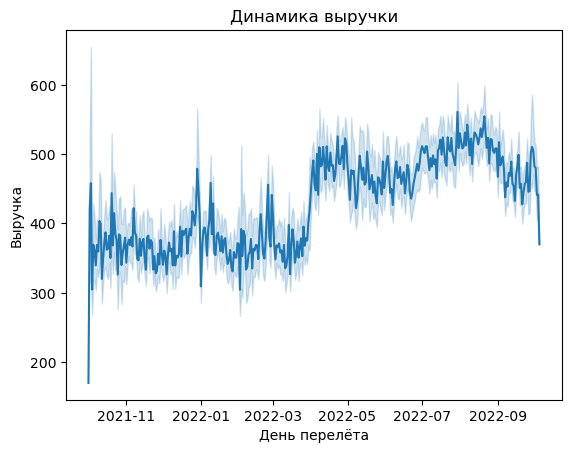

In [213]:
sns.lineplot(data=flight_data, x='Дата перелёта', y='Выручка')
plt.xlabel('День перелёта')
plt.ylabel('Выручка')
plt.title('Динамика выручки')
plt.plot()

<i>Вывод:
<br>В апреле 2022 наблюдался значительный (100 у.е., 29%) скачок цен</i>

<i><strong>1.2. График с разделением по типу маршрута</strong></i>

[]

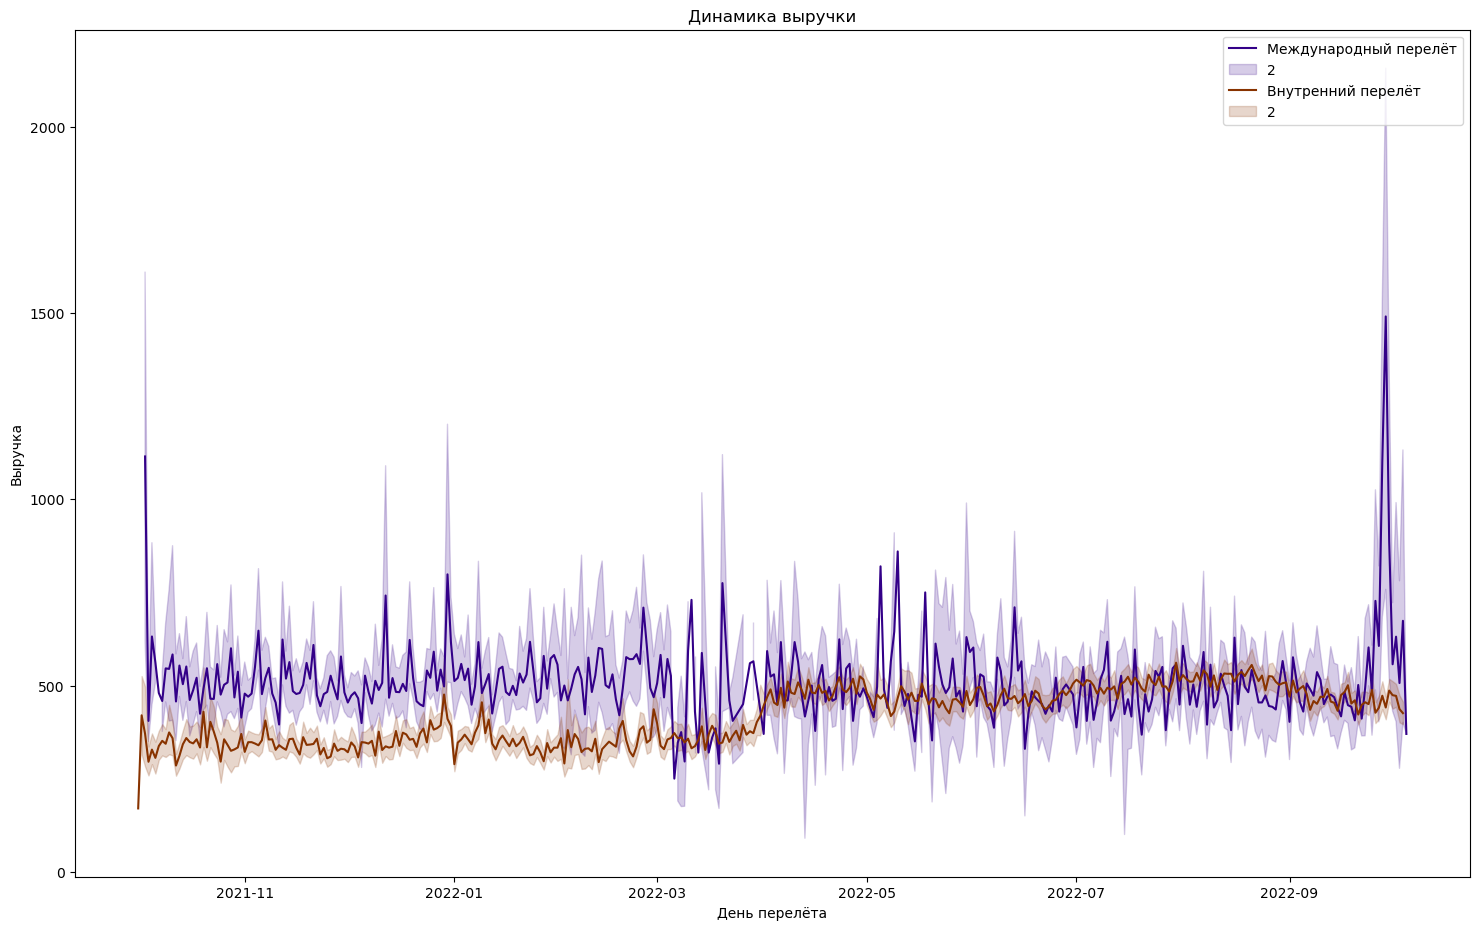

In [214]:
legend = ['Международный перелёт', 2, 'Внутренний перелёт', 2]
plt.figure(figsize=(18,11))

sns.lineplot(data=flight_data.query('`Международный перелёт` == True'), x='Дата перелёта', y='Выручка', color='#330088', legend=True)
sns.lineplot(data=flight_data.query('`Международный перелёт` == False'), x='Дата перелёта', y='Выручка', color='#883300', legend=True)
plt.xlabel('День перелёта')
plt.ylabel('Выручка')
plt.title('Динамика выручки')
plt.legend(legend)
plt.plot()

In [215]:
for k in range(len(seasons)):
    print(f'{seasons[k]}___________________')
    print('Распределение международных перелётов')
    print(flight_data.query("Сезон == @seasons[@k] & `Международный перелёт` == True")['Выручка'].describe())
    print('\n')
    print('Распределение внутренних перелётов')
    print(flight_data.query("Сезон == @seasons[@k] & `Международный перелёт` == False")['Выручка'].describe())
    print('_________________________________________')
    print('\n')
    k += 1

Зима___________________
Распределение международных перелётов
count    1514.000000
mean      519.247028
std       221.451890
min        40.000000
25%       390.000000
50%       500.000000
75%       580.000000
max      2880.000000
Name: Выручка, dtype: float64


Распределение внутренних перелётов
count    10050.000000
mean       353.933333
std        192.791069
min         30.000000
25%        230.000000
50%        310.000000
75%        430.000000
max       5200.000000
Name: Выручка, dtype: float64
_________________________________________


Весна___________________
Распределение международных перелётов
count     388.000000
mean      497.345361
std       198.894657
min        60.000000
25%       387.500000
50%       470.000000
75%       590.000000
max      1450.000000
Name: Выручка, dtype: float64


Распределение внутренних перелётов
count    9912.000000
mean      436.386199
std       199.358510
min        20.000000
25%       300.000000
50%       410.000000
75%       540.000000
max     

<i><br>Выводы:
<br>1. Из графика:
   <br>1.1. До апреля 2022 года международные перелёты были заметно дороже внутренних, но затем средние цены примерно сравнялись
   <br>1.2. Внутренние перелёты сильнее отреагировали на скачок цен в апреле 2022 года
   <br>1.3. Стоимость международных перелётов в течение года была менее однородной, нежели стоимость внутренних
<br>2. Из статистики:
   <br>2.1. Самая неоднородняя выборка - Международные перелёты осенью (отклонение 277), самая однородняя - Международные перелёты летом (отклонение 161)
   <br>2.2. Самый дорогой перелёт наблюдался в группе Внутренние перелёты зимой (5200), самый дешёвый - Внутренние перелёты летом (10)
   <br>2.3. Для группы Международных перелётов самый дорогой - Осенью (4000), самый дешёвый - Летом (30)
   <br>2.4. Самая низкая медианная цена наблюдалась в группе Внутренних перелётов зимой (310), хотя в этой же группе был самый дорогой перелёт (скорее всего, выброс)
   <br>2.5. Самая высокая медианная цена наблюдалась в группе Международных перелётов зимой (500)</i>

<u><i>Для группировки по сезонам</i></u>

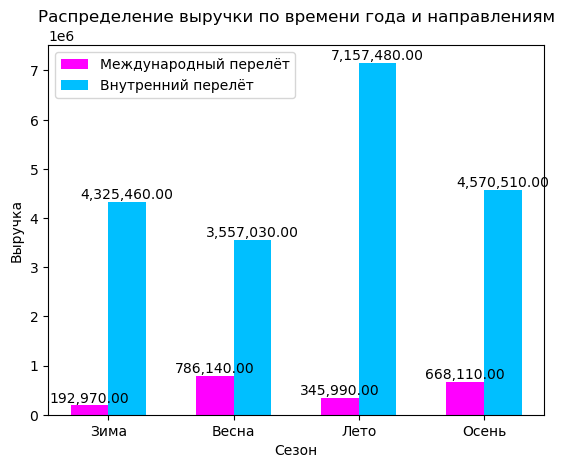

In [216]:
width = 0.3
x = np.arange(len(seasons))
y1 = list(flight_data.query('`Международный перелёт` == True').groupby(by='Сезон')['Выручка'].sum())
y2 = list(flight_data.query('`Международный перелёт` == False').groupby(by='Сезон')['Выручка'].sum())

fig, ax = plt.subplots()
ax.bar(x - width / 2, y1, width, label='Международный перелёт', color='fuchsia')
ax.bar(x + width / 2, y2, width, label='Внутренний перелёт', color='deepskyblue')

ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
ax.set_xlabel('Сезон')
ax.set_ylabel('Выручка')
ax.set_title('Распределение выручки по времени года и направлениям')
ax.legend()

plt.show()

<i>Выводы:
<br>1. Наибольшая выручка от продажи билетов на внутренние рейсы летом
<br>2. Наименьшая выручка от продажи билетов на международные рейсы зимой</i>

<i><strong>1.3. Графики с разделением по категории пассажиров (неопределённых не берём)</strong></i>

[]

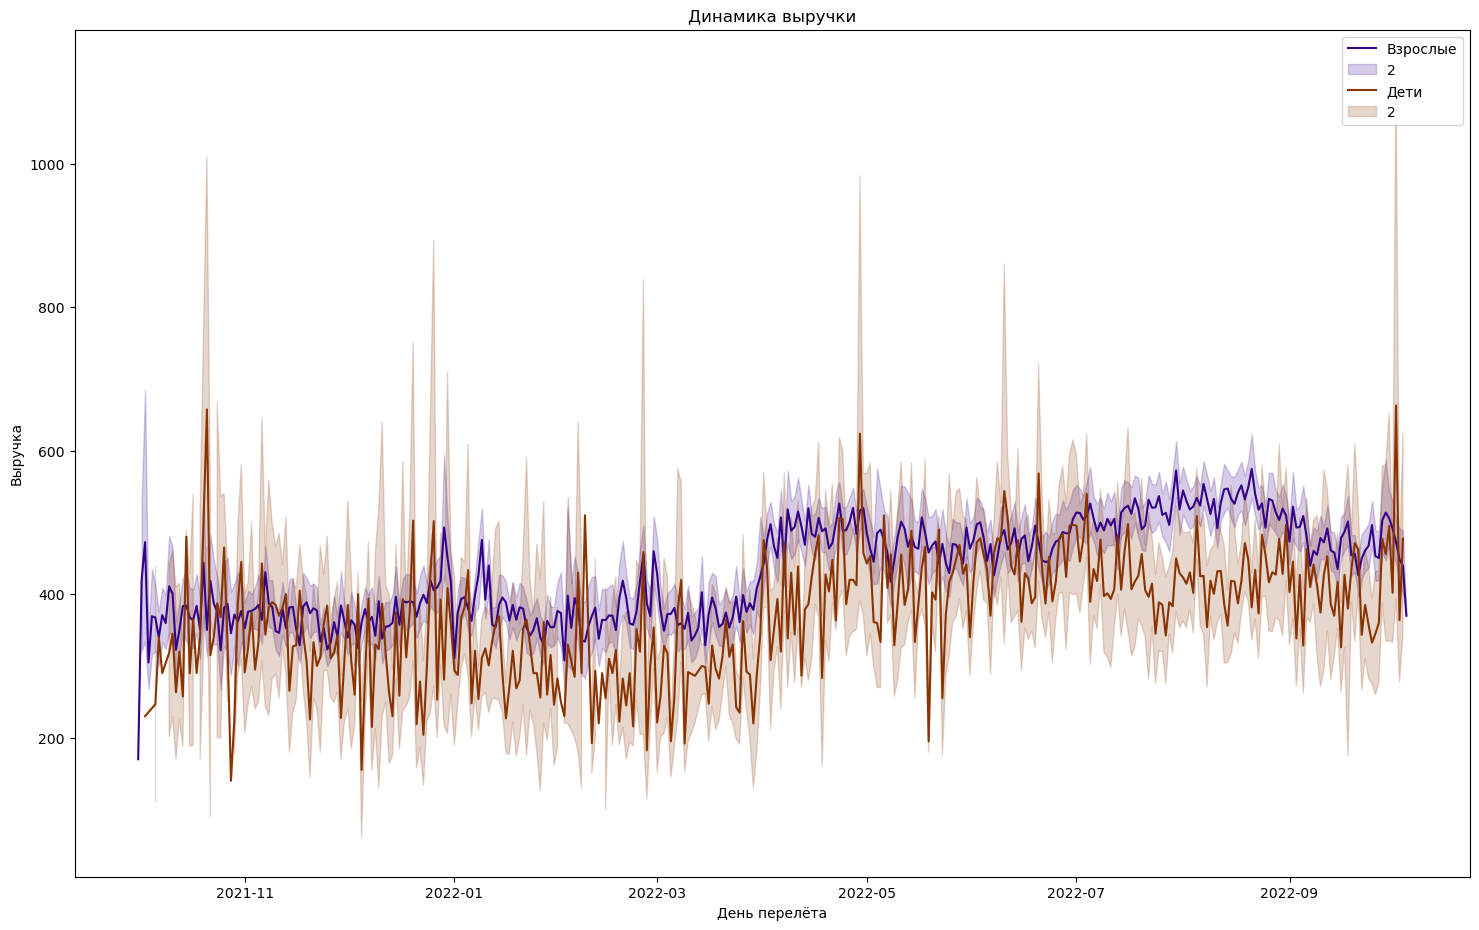

In [217]:
legend = ['Взрослые', 2, 'Дети', 2]
plt.figure(figsize=(18,11))

sns.lineplot(data=flight_data.query('`Возрастная категория` == "AD"'), x='Дата перелёта', y='Выручка', color='#330088', legend=True)
sns.lineplot(data=flight_data.query('`Возрастная категория` == "CHD"'), x='Дата перелёта', y='Выручка', color='#883300', legend=True)
plt.xlabel('День перелёта')
plt.ylabel('Выручка')
plt.title('Динамика выручки')
plt.legend(legend)
plt.plot()

In [218]:
for k in range(len(seasons)):
    print(f'{seasons[k]}___________________')
    print('Распределение взрослых билетов')
    print(flight_data.query("Сезон == @seasons[@k] & `Возрастная категория` == 'AD'")['Выручка'].describe())
    print('\n')
    print('Распределение детских билетов')
    print(flight_data.query("Сезон == @seasons[@k] & `Возрастная категория` == 'CHD'")['Выручка'].describe())
    print('_________________________________________')
    print('\n')
    k += 1

Зима___________________
Распределение взрослых билетов
count    10910.000000
mean       379.593034
std        204.830159
min         30.000000
25%        240.000000
50%        340.000000
75%        480.000000
max       5200.000000
Name: Выручка, dtype: float64


Распределение детских билетов
count     631.000000
mean      315.546751
std       186.092597
min        60.000000
25%       200.000000
50%       280.000000
75%       390.000000
max      2280.000000
Name: Выручка, dtype: float64
_________________________________________


Весна___________________
Распределение взрослых билетов
count    9672.000000
mean      443.339537
std       200.682151
min        20.000000
25%       300.000000
50%       410.000000
75%       550.000000
max      3360.000000
Name: Выручка, dtype: float64


Распределение детских билетов
count     612.000000
mean      373.807190
std       164.535896
min        80.000000
25%       270.000000
50%       350.000000
75%       460.000000
max      2300.000000
Name: Выруч

<i>Выводы:
<br>1. Из графика:
<br>1.1. Детские билеты стабильно дешевле взролых
<br>1.2. График цен на детские билеты более ломаный, наблюдаются большие перепады цен, хотя статистика говорит, что стандартное отклонение цен на детские
билеты стабильно меньше, чем цен на взрослые билеты (загадка)
<br>1.3. Наблюдается скачок цен для обеих категорий в апреле 2022 года
<br>2. Из статистики:
<br>2.1. Группа детских билетов более однородна, чем взрослых билетов
<br>2.2.
<table>
    <tr>
        <th>Показатель</th>
        <th>Самый низкий показатель</th>
        <th>Самый высокий показатель</th>
    </tr>
    <tr>
        <td>Отклонение</td>
        <td>Детские билеты Весна, 164 (самая однородняя выборка)</td>
        <td>Взрослые билеты Осень, 222 (самая неоднородняя выборка)</td>
    </tr>
    <tr>
        <td>Минимальная цена</td>
        <td>Детские билеты Лето, 10 (самый дешёвый билет)</td>
        <td>Детские билеты Весна, 80</td>
    </tr>
    <tr>
        <td>Максиимальная цена</td>
        <td>Детские билеты Лето, 1580</td>
        <td>Взрослые билеты Зима, 5200 (самый дорогой билет)</td>
    </tr>
</table>
</i>

<u><i>Для группировки по сезонам</i></u>

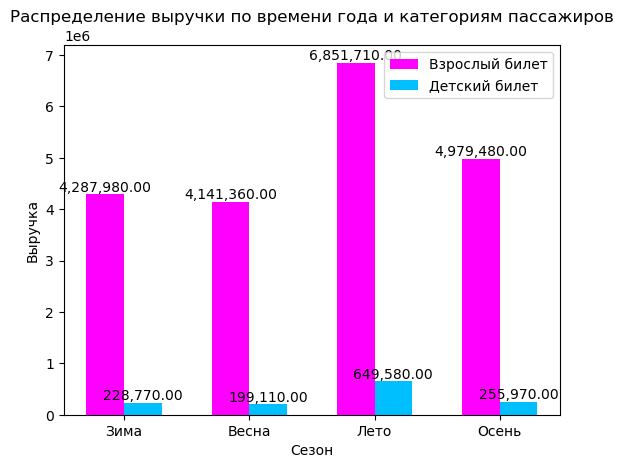

In [219]:
width = 0.3
x = np.arange(len(seasons))
y1 = list(flight_data.query('`Возрастная категория` == "AD"').groupby(by='Сезон')['Выручка'].sum())
y2 = list(flight_data.query('`Возрастная категория` == "CHD"').groupby(by='Сезон')['Выручка'].sum())

fig, ax = plt.subplots()
ax.bar(x - width / 2, y1, width, label='Взрослый билет', color='fuchsia')
ax.bar(x + width / 2, y2, width, label='Детский билет', color='deepskyblue')

ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
ax.set_xlabel('Сезон')
ax.set_ylabel('Выручка')
ax.set_title('Распределение выручки по времени года и категориям пассажиров')
ax.legend()

plt.show()

<i>Выводы:
<br>1. Наибольшая выручка поступает от продажи взрослых билетов летом
<br>2. Наименьшая выручка поступает от продажи детских билетов весной</i>

<i><strong>1.4. Графики с разделением по программе лояльности</strong></i>

[]

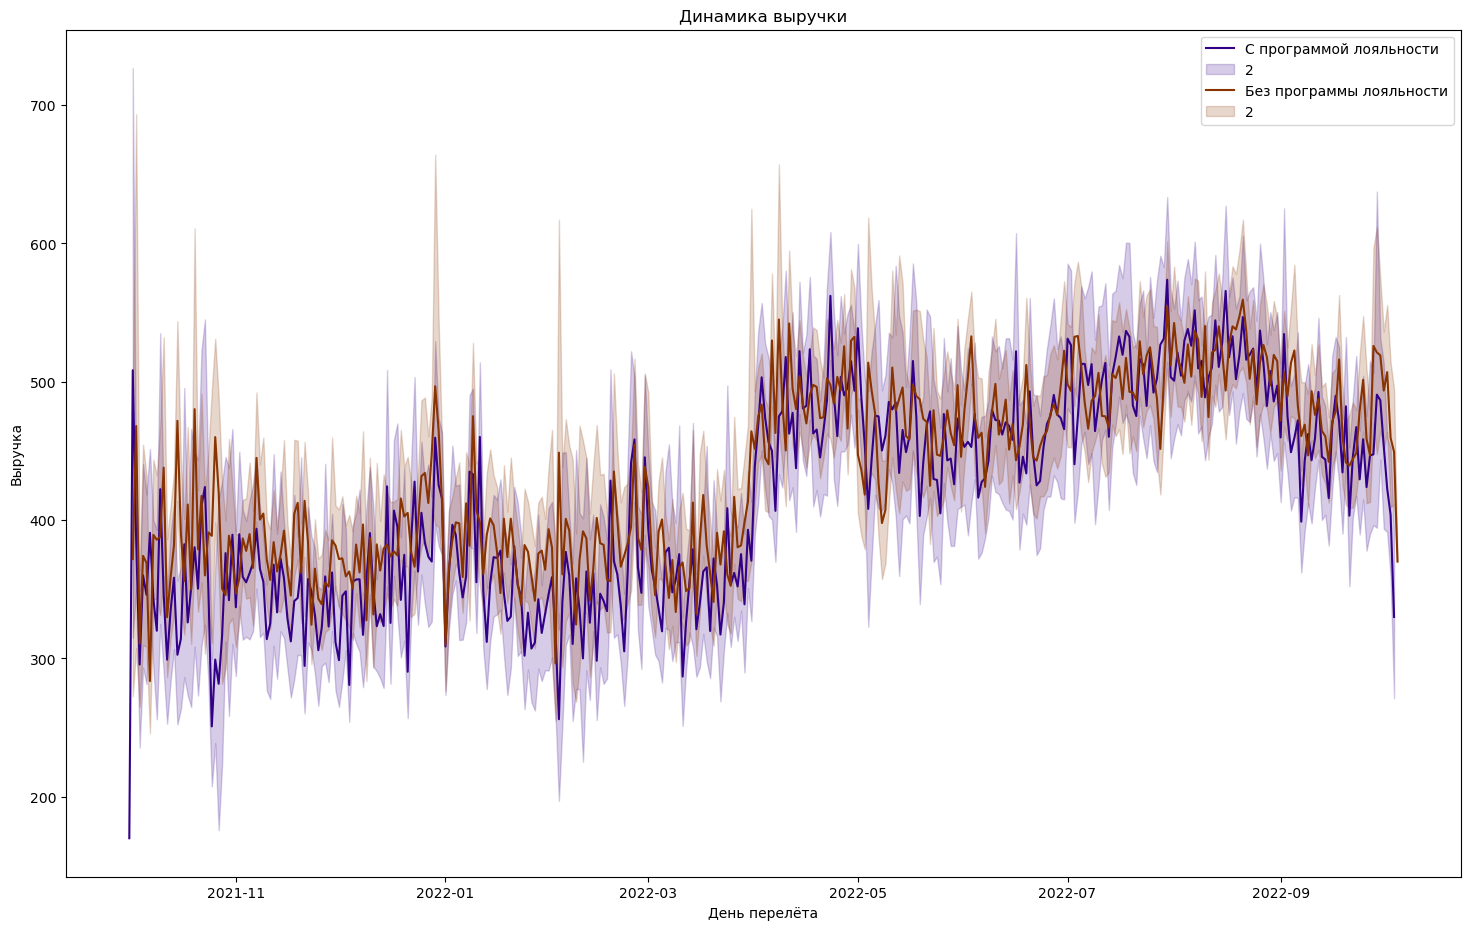

In [220]:
legend = ['С программой лояльности', 2, 'Без программы лояльности', 2]
plt.figure(figsize=(18,11))

sns.lineplot(data=flight_data.query('`Наличие системы лояльности` == True'), x='Дата перелёта', y='Выручка', color='#330088', legend=True)
sns.lineplot(data=flight_data.query('`Наличие системы лояльности` == False'), x='Дата перелёта', y='Выручка', color='#883300', legend=True)
plt.xlabel('День перелёта')
plt.ylabel('Выручка')
plt.title('Динамика выручки')
plt.legend(legend)
plt.plot()

In [221]:
for k in range(len(seasons)):
    print(f'{seasons[k]}___________________')
    print('Распределение с программой лояльности')
    print(flight_data.query("Сезон == @seasons[@k] & `Наличие системы лояльности` == True")['Выручка'].describe())
    print('\n')
    print('Распределение без программы лояльности')
    print(flight_data.query("Сезон == @seasons[@k] & `Наличие системы лояльности` == False")['Выручка'].describe())
    print('_________________________________________')
    print('\n')
    k += 1

Зима___________________
Распределение с программой лояльности
count    4785.000000
mean      361.210031
std       196.574816
min        30.000000
25%       230.000000
50%       320.000000
75%       440.000000
max      1880.000000
Name: Выручка, dtype: float64


Распределение без программы лояльности
count    6779.000000
mean      385.717657
std       209.368997
min        30.000000
25%       240.000000
50%       340.000000
75%       490.000000
max      5200.000000
Name: Выручка, dtype: float64
_________________________________________


Весна___________________
Распределение с программой лояльности
count    4355.000000
mean      430.110218
std       200.811369
min        40.000000
25%       290.000000
50%       400.000000
75%       530.000000
max      2120.000000
Name: Выручка, dtype: float64


Распределение без программы лояльности
count    5945.000000
mean      444.962153
std       198.610337
min        20.000000
25%       310.000000
50%       410.000000
75%       550.000000
max     

<i>Выводы:
<br>1. Из графика:
<br>1.1. Однородность выборок по признаку программы лояльности примерно одинакова
<br>1.2. Цены на билеты, приобретённые по программе лояльности незначительно ниже
<br>1.3. На обоих графиках явно выражен скачок цен апреля 2022 года
<br>2. Из статистики
<table>
    <tr>
        <th>Показатель</th>
        <th>Самый низкий показатель</th>
        <th>Самый высокий показатель</th>
    </tr>
    <tr>
        <td>Отклонение</td>
        <td>С программой лояльности Зима; 196,57 (самая однородняя выборка)</td>
        <td>Без программы лояльности Осень; 222,78 (самая неоднородняя выборка)</td>
    </tr>
    <tr>
        <td>Минимальная цена</td>
        <td>С программой лояльности Лето; 10 (самый дешёвый билет)</td>
        <td>С программой лояльности Весна; 40</td>
    </tr>
    <tr>
        <td>Максиимальная цена</td>
        <td>С программой лояльности Зима; 1880</td>
        <td>Без программы лояльности Зима; 5200 (самый дорогой билет)</td>
    </tr>
</table>
</i>

<u><i>Для группировки по сезонам</i></u>

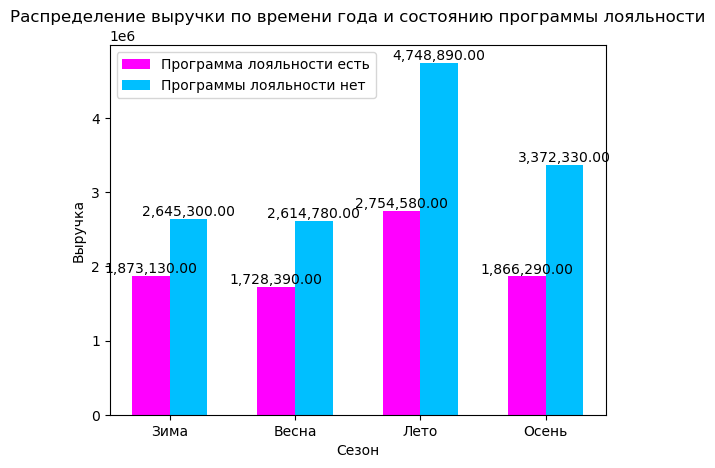

In [222]:
width = 0.3
x = np.arange(len(seasons))
y1 = list(flight_data.query('`Наличие системы лояльности` == True').groupby(by='Сезон')['Выручка'].sum())
y2 = list(flight_data.query('`Наличие системы лояльности` == False').groupby(by='Сезон')['Выручка'].sum())

fig, ax = plt.subplots()
ax.bar(x - width / 2, y1, width, label='Программа лояльности есть', color='fuchsia')
ax.bar(x + width / 2, y2, width, label='Программы лояльности нет', color='deepskyblue')

ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
ax.set_xlabel('Сезон')
ax.set_ylabel('Выручка')
ax.set_title('Распределение выручки по времени года и состоянию программы лояльности')
ax.legend()

plt.show()

<i>Выводы:
<br>1. Программа лояльности снижает выручку компании
<br>2. Самым прибыльным сезоном остаётся лето, при чём для обоих состояний программы лояльности
<br>3. Меньше всего выручки поступает весной, также для обоих состояний программы лояльности</i>

<i><strong>1.5. Графики с разделением по способу покупки</strong></i>

[]

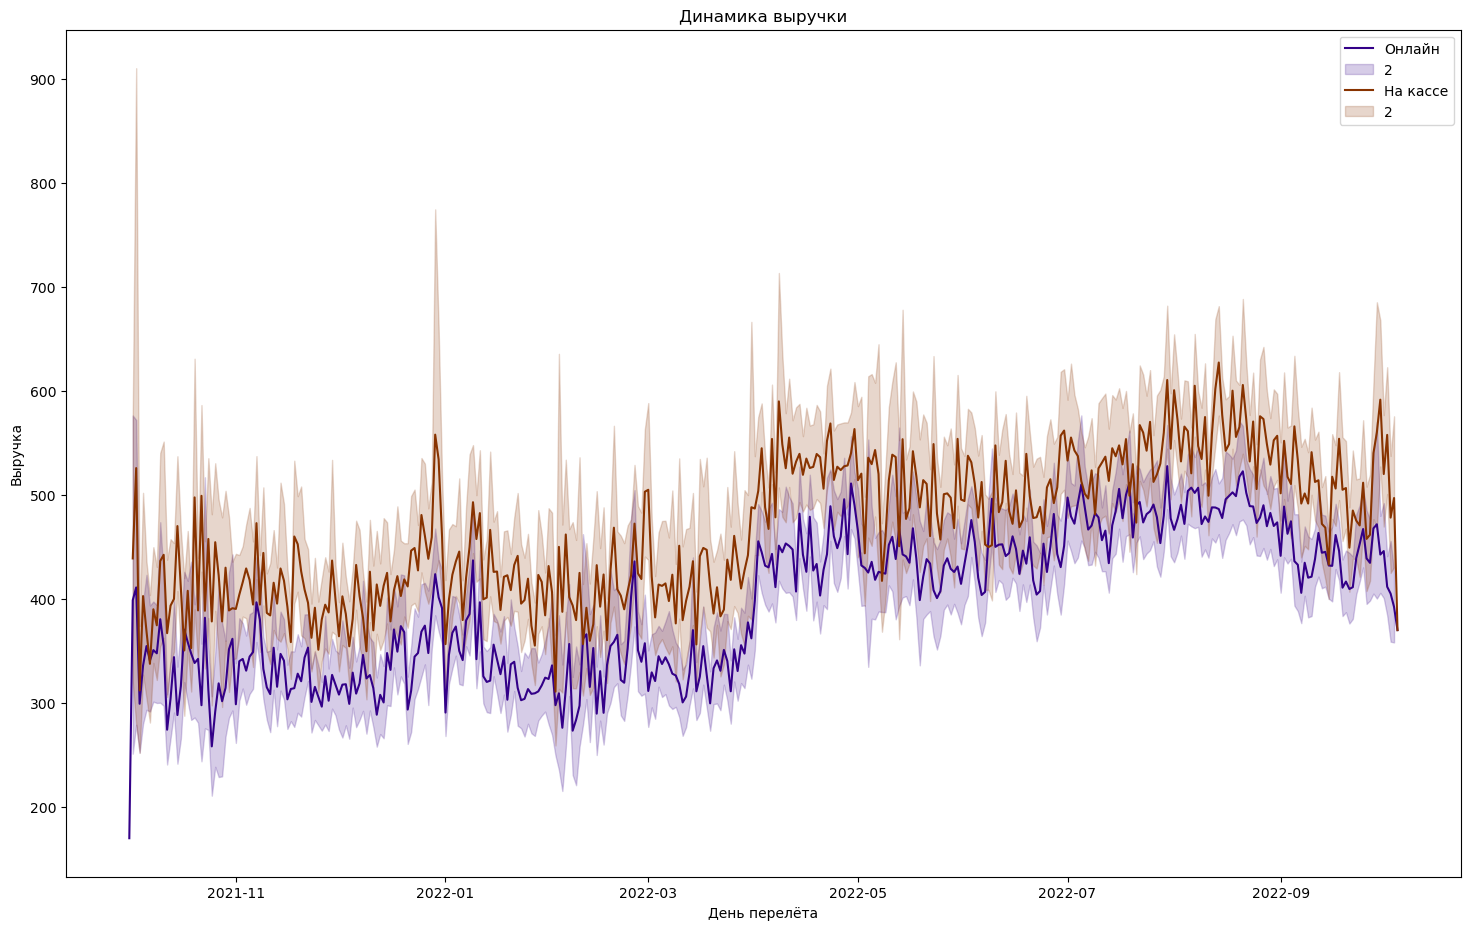

In [223]:
legend = ['Онлайн', 2, 'На кассе', 2]
plt.figure(figsize=(18,11))

sns.lineplot(data=flight_data.query('`Билет приобретён по сети` == True'), x='Дата перелёта', y='Выручка', color='#330088', legend=True)
sns.lineplot(data=flight_data.query('`Билет приобретён по сети` == False'), x='Дата перелёта', y='Выручка', color='#883300', legend=True)
plt.xlabel('День перелёта')
plt.ylabel('Выручка')
plt.title('Динамика выручки')
plt.legend(legend)
plt.plot()

In [224]:
for k in range(len(seasons)):
    print(f'{seasons[k]}___________________')
    print('Распределение билетов, купленных онлайн')
    print(flight_data.query("Сезон == @seasons[@k] & `Билет приобретён по сети` == True")['Выручка'].describe())
    print('\n')
    print('Распределение билетов, купленных на кассе')
    print(flight_data.query("Сезон == @seasons[@k] & `Билет приобретён по сети` == False")['Выручка'].describe())
    print('_________________________________________')
    print('\n')
    k += 1

Зима___________________
Распределение билетов, купленных онлайн
count    6384.000000
mean      341.434837
std       182.284430
min        30.000000
25%       220.000000
50%       300.000000
75%       420.000000
max      2270.000000
Name: Выручка, dtype: float64


Распределение билетов, купленных на кассе
count    5180.000000
mean      417.654440
std       221.876444
min        30.000000
25%       270.000000
50%       380.000000
75%       520.000000
max      5200.000000
Name: Выручка, dtype: float64
_________________________________________


Весна___________________
Распределение билетов, купленных онлайн
count    5880.000000
mean      401.651361
std       178.512339
min        20.000000
25%       280.000000
50%       380.000000
75%       490.000000
max      2300.000000
Name: Выручка, dtype: float64


Распределение билетов, купленных на кассе
count    4420.000000
mean      487.945701
std       215.102846
min        60.000000
25%       340.000000
50%       460.000000
75%       600.00000

<i>Выводы:
<br>1. Из графика:
<br>1.1. Билеты, купленные онлайн, приносят меньше прибыли
<br>1.2. Разрыв между ценами в двух случаях очевиден
<br>1.3. Для обоих выборок характерен скачок цен в апреле 2022 на одинаковую (примерно) величину
<br>1.4. Однородность цен на билеты через онлайн и на кассе примерно равна
<br>2. Из статистики:
    
</i>
<table>
    <tr>
        <th>Показатель</th>
        <th>Самый низкий показатель</th>
        <th>Самый высокий показатель</th>
    </tr>
    <tr>
        <td>Отклонение</td>
        <td>Купленные онлайн весной; 178,51 (самая однородняя выборка)</td>
        <td>Купленные на кассе осенью; 237.99 (самая неоднородняя выборка)</td>
    </tr>
    <tr>
        <td>Минимальная цена</td>
        <td>Купленные онлайн летом; 10 (самый дешёвый билет)</td>
        <td>Купленные на кассе весной; 60</td>
    </tr>
    <tr>
        <td>Максиимальная цена</td>
        <td>Купленные онлайн зимой; 2270</td>
        <td>Купленные на кассе зимой; 5200 (самый дорогой билет)</td>
    </tr>
</table>

<u><i>Для группировки по сезонам</i></u>

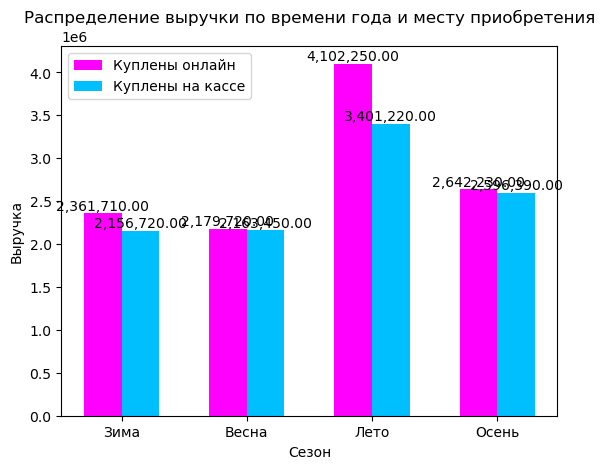

In [225]:
width = 0.3
x = np.arange(len(seasons))
y1 = list(flight_data.query('`Билет приобретён по сети` == True').groupby(by='Сезон')['Выручка'].sum())
y2 = list(flight_data.query('`Билет приобретён по сети` == False').groupby(by='Сезон')['Выручка'].sum())

fig, ax = plt.subplots()
ax.bar(x - width / 2, y1, width, label='Куплены онлайн', color='fuchsia')
ax.bar(x + width / 2, y2, width, label='Куплены на кассе', color='deepskyblue')

ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.bar_label(ax.containers[0], fmt='{:,.2f}')
ax.bar_label(ax.containers[1], fmt='{:,.2f}')
ax.set_xlabel('Сезон')
ax.set_ylabel('Выручка')
ax.set_title('Распределение выручки по времени года и месту приобретения')
ax.legend()

plt.show()

<i>Выводы:
<br>1. Место покупки имеет значение только для билетов, купленных летом, и, в меньшей степени, зимой</i>

<i><u>Готово</u></i>

<h4>2. Исключение выбросов</h4>

<i><strong>Итак, сверим, насколько наше распределение отлично от нормального</strong></i>

In [226]:
example_loc = flight_data['Выручка'].mean()
example_scale = flight_data['Выручка'].std()
example_size = flight_data.shape[0]

In [227]:
print(f'Медиана: {example_loc}, СКО: {example_scale}, Размер: {example_size}')

Медиана: 437.6317228805834, СКО: 214.60489135602114, Размер: 49365


In [228]:
example_norm_distribution = st.norm.rvs(loc=example_loc, scale=example_scale, size=example_size)

[]

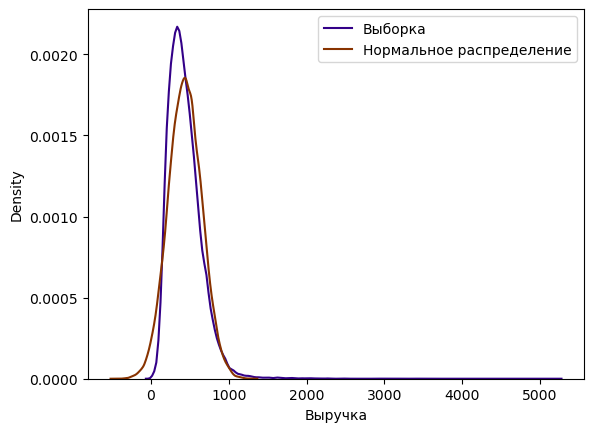

In [229]:
sns.kdeplot(data=flight_data['Выручка'], color='#330088')
sns.kdeplot(data=example_norm_distribution, color='#883300')
plt.legend(['Выборка', 'Нормальное распределение'])
plt.plot()

[]

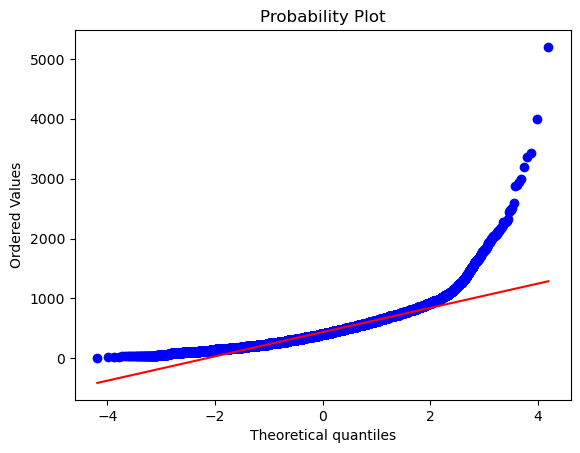

In [230]:
st.probplot(flight_data['Выручка'], dist='norm', plot=plt)
plt.plot()

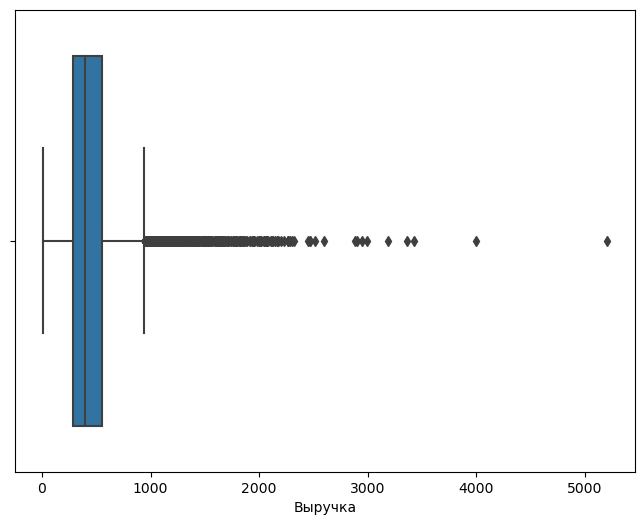

In [231]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=flight_data['Выручка'])
plt.show()

<i>Выбросы начинаются примерно от значения 2500</i>

<i>Наше распределение явно отличается от нормального, поэтому будут удаляться значения, сильно отличающиеся от основного массива</i>

In [232]:
flight_data['Выручка'].nlargest(20)

26743    5200
19313    4000
19267    3430
38552    3360
9537     3190
901      2990
10123    2950
19299    2900
29911    2880
46196    2600
22407    2510
20404    2470
25572    2470
48008    2450
19189    2320
5364     2300
25363    2280
2206     2270
6745     2270
19732    2270
Name: Выручка, dtype: int64

<i>Предлагаю удалить 14 максимальных значений</i>

In [233]:
for i in range(14):
    flight_data = flight_data.drop(flight_data[flight_data['Выручка'] == flight_data['Выручка'].max()].index)
    i += 1

flight_data = flight_data.reset_index(drop=True)
flight_data['Выручка'].nlargest(20)

5363     2300
25354    2280
2205     2270
6744     2270
19725    2270
31627    2230
37882    2200
17401    2170
45018    2170
46448    2160
44461    2150
31575    2130
9776     2120
21813    2110
23959    2110
29035    2080
36739    2070
6112     2060
17095    2060
7631     2050
Name: Выручка, dtype: int64

[]

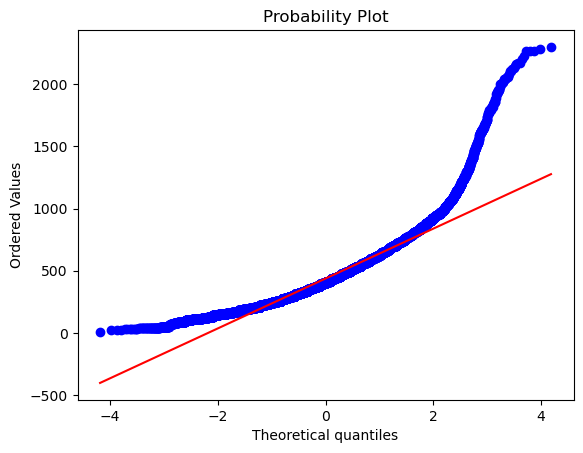

In [234]:
st.probplot(flight_data['Выручка'], dist='norm', plot=plt)
plt.plot()

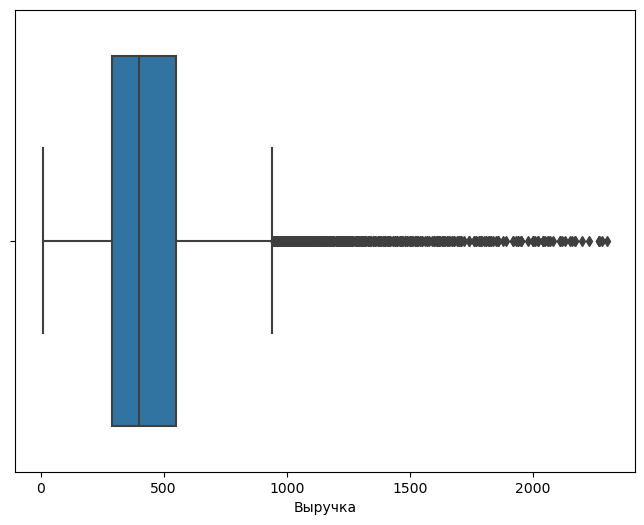

In [235]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=flight_data['Выручка'])
plt.show()

In [236]:
flight_data['Выручка'].describe()

count    49350.000000
mean       436.838298
std        209.373283
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       2300.000000
Name: Выручка, dtype: float64

<i><br>Выводы:
<br>1. Наше распределение отличается от нормального
<br>2. Удалено 14 слишком больших значений
<br>3. Медианная цена билета - 400 у.е.
<br>4. Цены варьируются от 10 до 2300 у.е.
<br>
<br><u>Готово</u></i>

<h4>3. Исследование сезонности</h4>

In [237]:
flight_data_sort = flight_data.groupby('Сезон')['Выручка'].sum().reset_index()
flight_data_sort

,Сезон,Выручка
0,Весна,4511880
1,Зима,4335090
2,Лето,7495580
3,Осень,5215420


<i><strong>3.1. Столбчатые диаграммы по сезонной выручке</strong></i>

[]

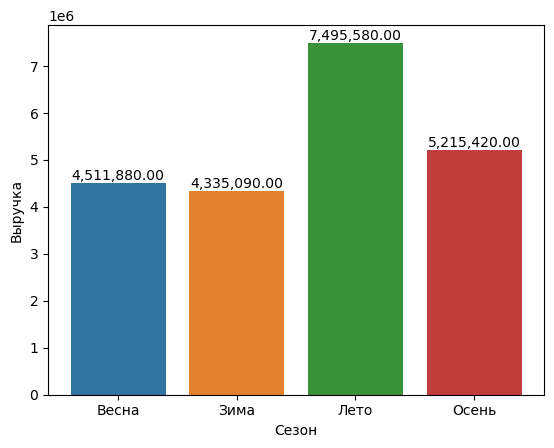

In [238]:
ax = sns.barplot(flight_data_sort, x='Сезон', y='Выручка')
ax.bar_label(ax.containers[0], fmt='{:,.2f}', fontsize=10)
plt.plot()

<i><br>Выводы:
<br>1. Выручка летом максимальна (7,5 млн у.е.) (сезон отпусков)
<br>2. Минимальная выручка - зимой (4,3 млн у.е.) (холодно)
<br>
<br><u>Готово</u></i>

<i><strong>3.2. Проверка гипотезы: выручка осенью и зимой ОДИНАКОВА</strong></i>

<u><i>Определим характер распределения выручки осенью и зимой</i></u>

[]

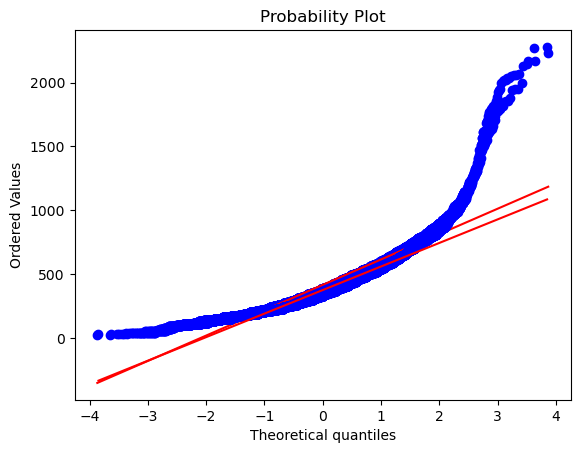

In [239]:
st.probplot(flight_data.query('Сезон == "Осень"')['Выручка'], dist='norm', plot=plt)
st.probplot(flight_data.query('Сезон == "Зима"')['Выручка'], dist='norm', plot=plt)

plt.plot()

<i>Вывод: t-test применять можно, поскольку графики примерно совпадают друг с другом, не имеют выбросов</i>

In [323]:
alpha = 0.05

result = st.ttest_ind(flight_data.query('Сезон == "Осень"')['Выручка'], flight_data.query('Сезон == "Зима"')['Выручка'])

print(f'P-Value: {result.pvalue}')

if result.pvalue < alpha:
    print('Гипотезу об одинаковости распределения выручки осенью и зимой ПРИНИМАЕМ')
else:
    print('Гипотезу об одинаковости распределения выручки осенью и зимой ОТВЕРГАЕМ')

P-Value: 6.987442354315125e-54
Гипотезу об одинаковости распределения выручки осенью и зимой ПРИНИМАЕМ


<i><br>Вывод:
<br>Выручка осенью и зимой отличается существенно
<br>
<br><u>Готово</u></i>

<i><strong>3.3. Проверка корреляции продаж по месяцам</strong></i>

In [241]:
flight_data.groupby(pd.Grouper(key='Дата покупки', freq='M'))['Выручка'].count().reset_index()

,Дата покупки,Выручка
0,2021-10-31,3614
1,2021-11-30,5169
2,2021-12-31,4564
3,2022-01-31,3589
4,2022-02-28,3454
5,2022-03-31,4324
6,2022-04-30,3974
7,2022-05-31,3623
8,2022-06-30,3352
9,2022-07-31,5259


In [242]:
flight_data_month = flight_data.groupby(pd.Grouper(key='Дата покупки', freq='M'))['Выручка'].sum().reset_index()
flight_data_month.insert(2, 'Число продаж', flight_data.groupby(pd.Grouper(key='Дата покупки', freq='M'))['Выручка'].count().reset_index()['Выручка'])
flight_data_month

,Дата покупки,Выручка,Число продаж
0,2021-10-31,1325390,3614
1,2021-11-30,1842790,5169
2,2021-12-31,1752050,4564
3,2022-01-31,1352390,3589
4,2022-02-28,1348210,3454
5,2022-03-31,1819880,4324
6,2022-04-30,2032570,3974
7,2022-05-31,1714240,3623
8,2022-06-30,1612030,3352
9,2022-07-31,2638430,5259


[]

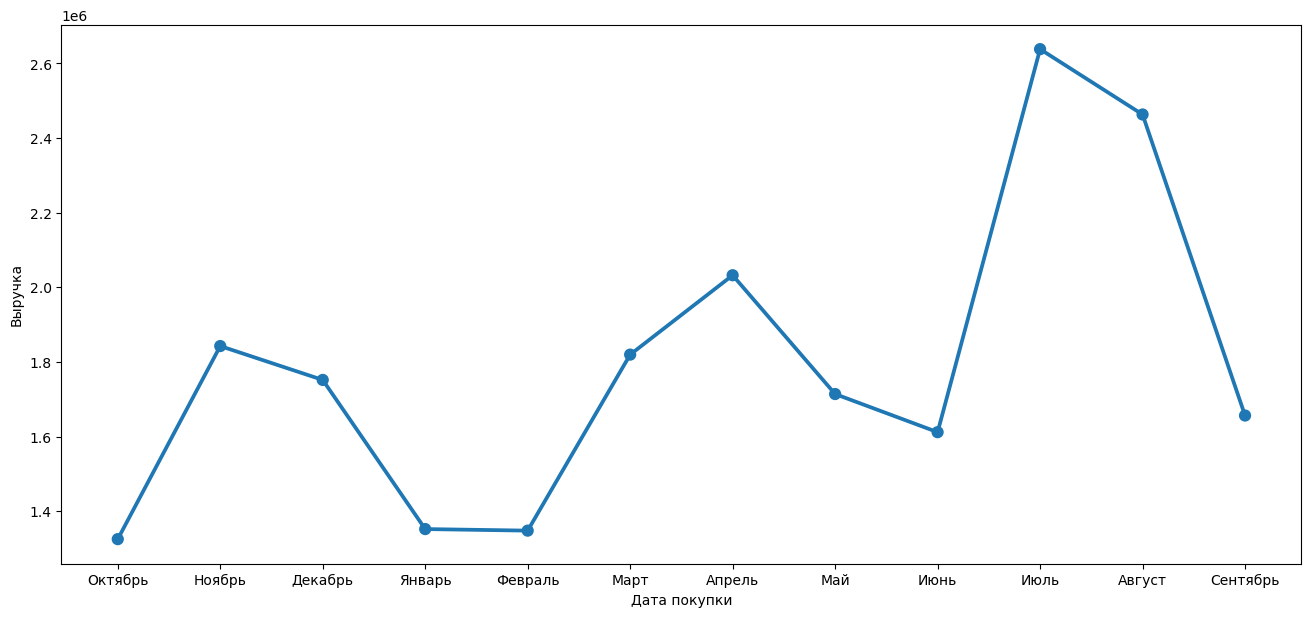

In [243]:
plt.figure(figsize=(16, 7))
ax = sns.pointplot(flight_data_month, x='Дата покупки', y='Выручка')
ax.set_xticklabels(['Октябрь', 'Ноябрь', 'Декабрь', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь'])
plt.plot()

[]

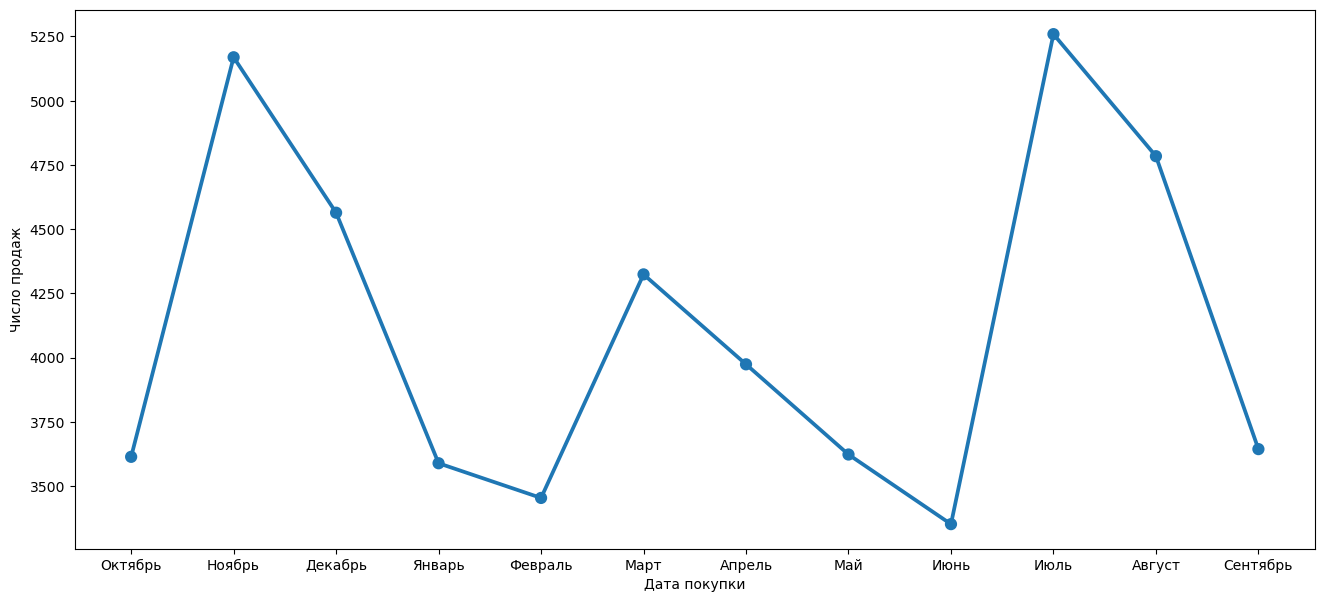

In [244]:
plt.figure(figsize=(16, 7))
ax = sns.pointplot(flight_data_month, x='Дата покупки', y='Число продаж')
ax.set_xticklabels(['Октябрь', 'Ноябрь', 'Декабрь', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь'])
plt.plot()

[]

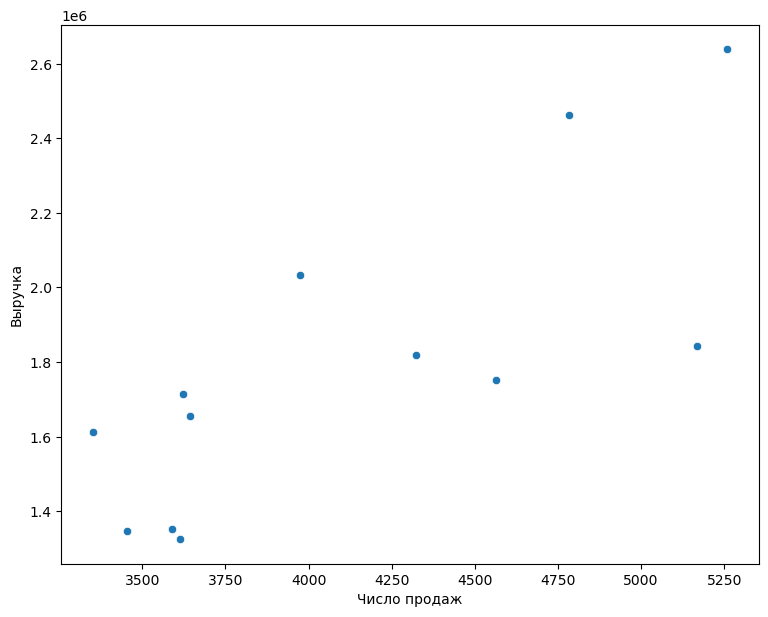

In [245]:
plt.figure(figsize=(9, 7))
ax = sns.scatterplot(flight_data_month, x='Число продаж', y='Выручка')
plt.plot()

In [246]:
st.linregress(x=flight_data_month['Число продаж'], y=flight_data_month['Выручка'])

LinregressResult(slope=471.0785191755819, intercept=-140812.9101095805, rvalue=0.7761846370608222, pvalue=0.0029952685489135606, stderr=121.0088852448517, intercept_stderr=503915.01744063804)

<i><br>Выводы:
<br>1. Между числом продаж и выручкой есть прямая зависимость, коэффициент корреляции равен 0,7762
<br>2. Уравнение регрессии имеет вид Y = -140812,9101 + 471,0785 * X + E
<br>3. Наименьшее количество продаж было в июне, а наибольшее - в июле
<br>4. Худший месяц по выручке - февраль (и январь), лучший - июль
<br>5. Есть второй пик - много людей покупает билеты в ноябре, вероятно, готовятся к Новому году
<br>
<br><u>Готово</u></i>

<i><strong>3.4. Распределение в зависимости от степени подготовки к полёту</strong></i>

In [247]:
flight_data.head(11)

,Дата покупки,Дата перелёта,Возрастная категория,Выручка,Город отправления,Город прибытия,Международный перелёт,Наличие системы лояльности,Билет приобретён по сети,Сезон
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,False,False,True,Зима
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,False,False,False,Зима
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,False,True,True,Зима
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,False,False,True,Зима
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,False,True,False,Зима
5,2021-11-29,2022-01-14,AD,250,MOW,DUS,True,False,True,Зима
6,2021-12-03,2022-01-06,AD,200,MOW,PEE,False,True,True,Зима
7,2021-11-28,2022-01-07,CHD,70,MOW,AER,False,True,True,Зима
8,2021-12-02,2022-01-10,CHD,490,MOW,NJC,False,True,True,Зима
9,2021-11-25,2022-01-03,AD,280,MOW,KUF,False,False,True,Зима


In [248]:
def filler(x):
    if x.days < 7:
        return 'Меньше недели'
    elif x.days in range(7, 28):
        return 'От недели до четырёх недель'
    elif x.days >= 28:
        return 'Более четырёх недель'

In [249]:
flight_data.insert(2, 'Дней до полёта', (flight_data['Дата перелёта'] - flight_data['Дата покупки']))
flight_data.insert(3, 'Степень подготовки', flight_data['Дней до полёта'].apply(lambda x: filler(x)))
flight_data['Степень подготовки'].value_counts()

Степень подготовки
Меньше недели                  19895
От недели до четырёх недель    18458
Более четырёх недель           10997
Name: count, dtype: int64

In [250]:
flight_data.pop('Дней до полёта')

0       35 days
1        3 days
2       37 days
3       28 days
4       35 days
          ...  
49345   11 days
49346   14 days
49347    3 days
49348    2 days
49349   16 days
Name: Дней до полёта, Length: 49350, dtype: timedelta64[ns]

[]

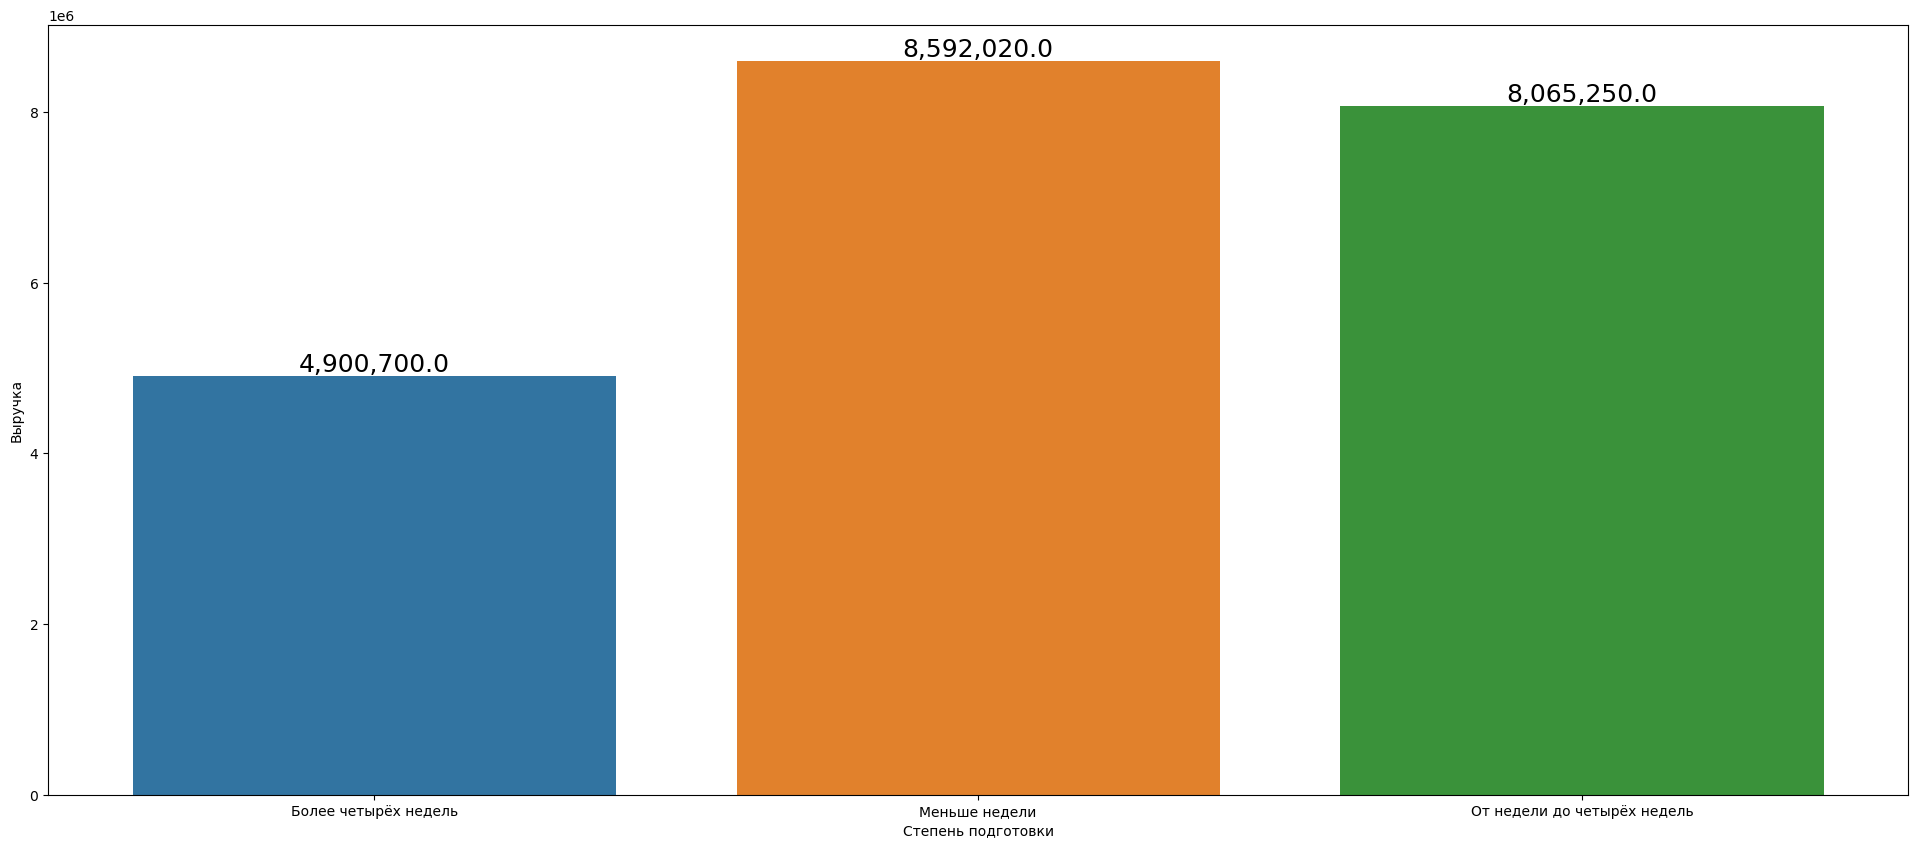

In [251]:
plt.figure(figsize=(24,10))
ax = sns.barplot(flight_data[['Степень подготовки', 'Выручка']].groupby('Степень подготовки').sum().reset_index(), x='Степень подготовки', y='Выручка')
ax.bar_label(ax.containers[0], fontsize=18, fmt='{:,}')
plt.plot()

[]

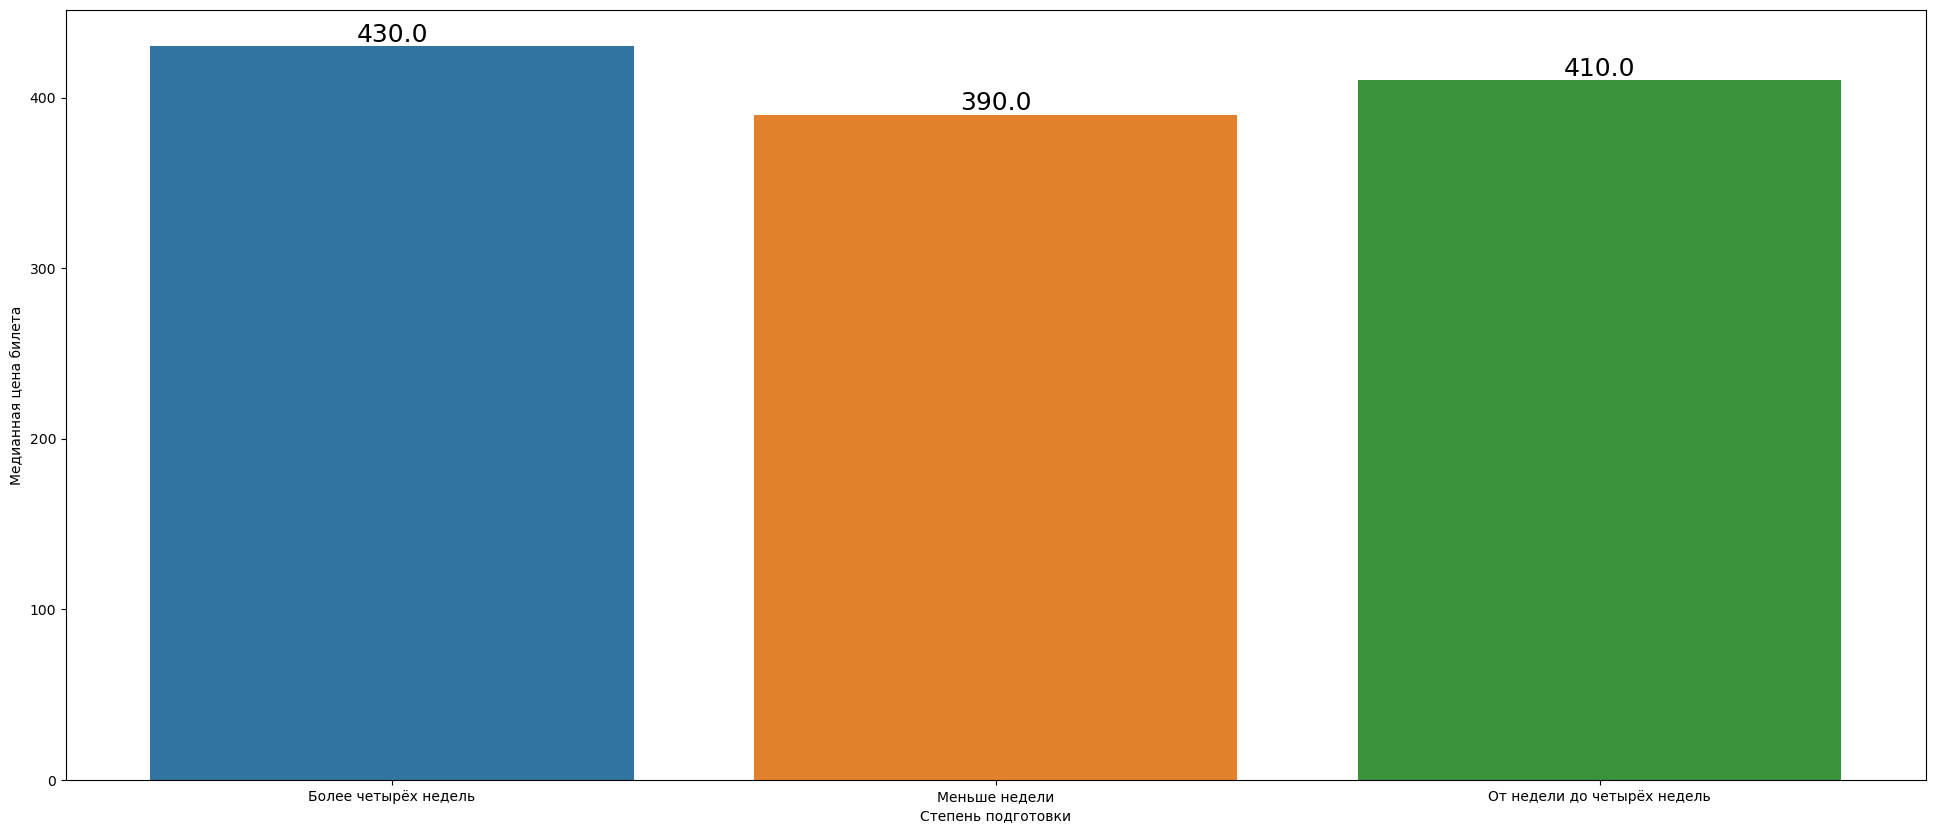

In [252]:
plt.figure(figsize=(24,10))
ax = sns.barplot(flight_data[['Степень подготовки', 'Выручка']].groupby('Степень подготовки').median().reset_index(), x='Степень подготовки', y='Выручка')
ax.bar_label(ax.containers[0], fontsize=18, fmt='{:,}')
ax.set_ylabel('Медианная цена билета')
plt.plot()

[]

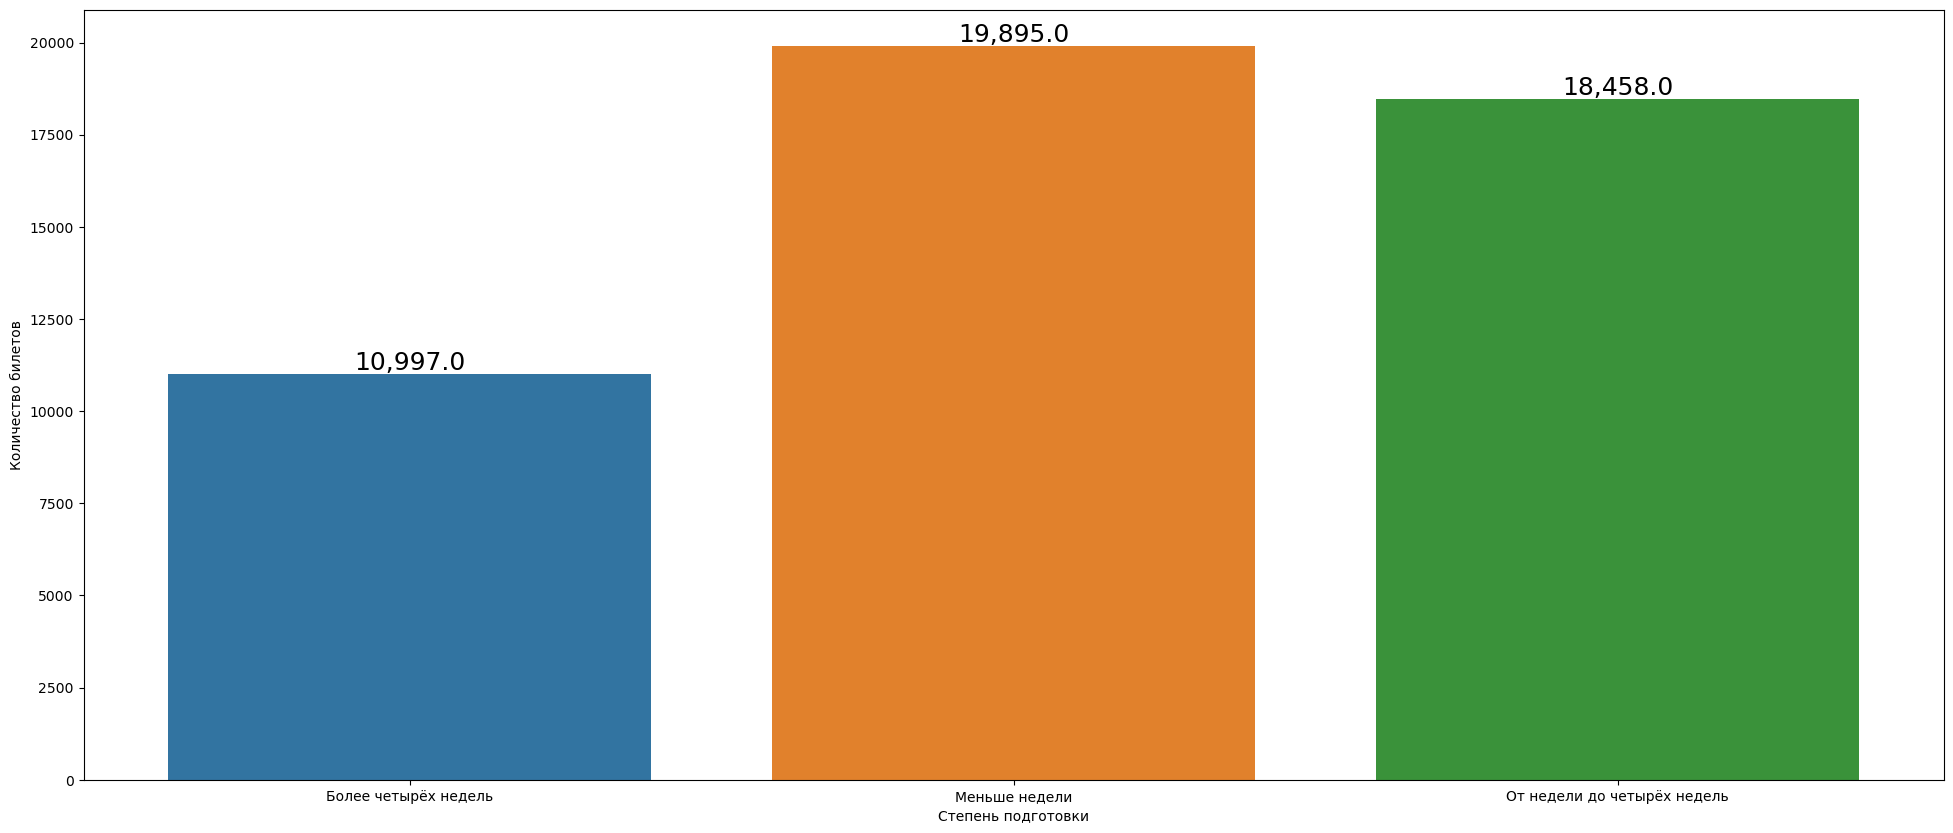

In [253]:
plt.figure(figsize=(24,10))
ax = sns.barplot(flight_data[['Степень подготовки', 'Выручка']].groupby('Степень подготовки').count().reset_index(), x='Степень подготовки', y='Выручка')
ax.bar_label(ax.containers[0], fontsize=18, fmt='{:,}')
ax.set_ylabel('Количество билетов')
plt.plot()

[]

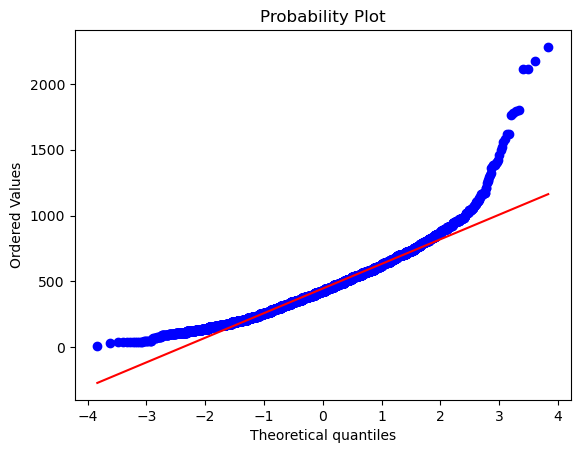

In [327]:
st.probplot(flight_data.query('`Степень подготовки` == "Более четырёх недель"')['Выручка'], dist='norm', plot=plt)

plt.plot()

[]

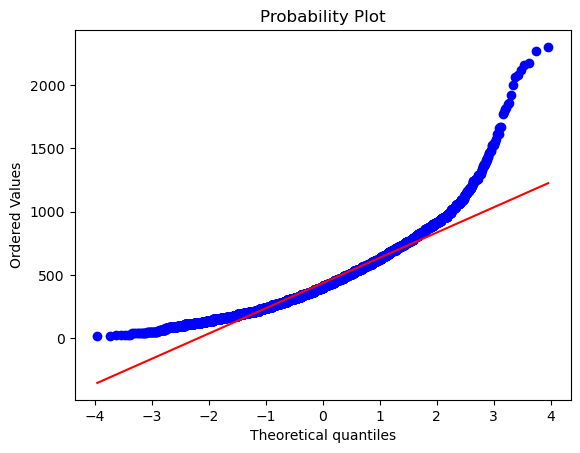

In [328]:
#st.probplot(flight_data.query('`Степень подготовки` == "Более четырёх недель"')['Выручка'], dist='norm', plot=plt)
st.probplot(flight_data.query('`Степень подготовки` == "От недели до четырёх недель"')['Выручка'], dist='norm', plot=plt)
#st.probplot(flight_data.query('Сезон == "Зима"')['Выручка'], dist='norm', plot=plt)

plt.plot()

[]

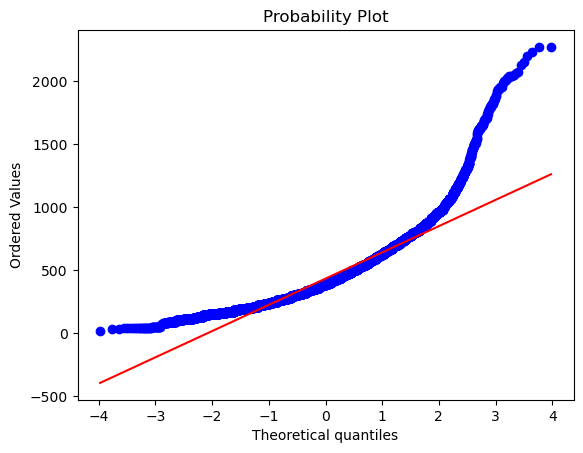

In [329]:
#st.probplot(flight_data.query('`Степень подготовки` == "Более четырёх недель"')['Выручка'], dist='norm', plot=plt)
#st.probplot(flight_data.query('`Степень подготовки` == "От недели до четырёх недель"')['Выручка'], dist='norm', plot=plt)
st.probplot(flight_data.query('`Степень подготовки` == "Меньше недели"')['Выручка'], dist='norm', plot=plt)

plt.plot()

[]

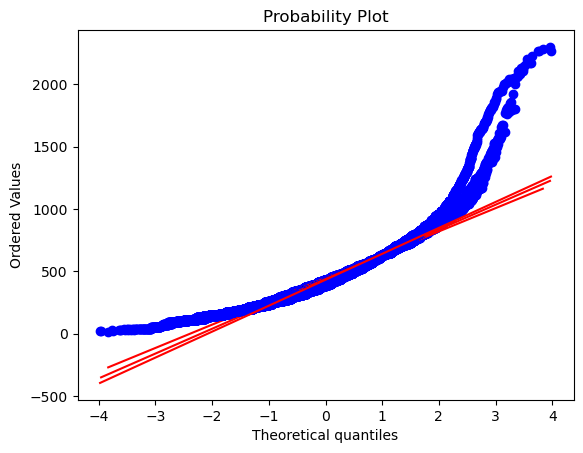

In [330]:
st.probplot(flight_data.query('`Степень подготовки` == "Более четырёх недель"')['Выручка'], dist='norm', plot=plt)
st.probplot(flight_data.query('`Степень подготовки` == "От недели до четырёх недель"')['Выручка'], dist='norm', plot=plt)
st.probplot(flight_data.query('`Степень подготовки` == "Меньше недели"')['Выручка'], dist='norm', plot=plt)

plt.plot()

In [342]:
#Kruskal_Wallis Test

testing_kruskal = st.kruskal(flight_data.query('`Степень подготовки` == "Более четырёх недель"')['Выручка'], 
           flight_data.query('`Степень подготовки` == "От недели до четырёх недель"')['Выручка'],
           flight_data.query('`Степень подготовки` == "Меньше недели"')['Выручка'])
print(f'P-Value: {testing_kruskal.pvalue}')
print(f'Statistics: {testing_kruskal.statistic}')

hypothezis_0 = 'Медианная выручка для разных групп по подготовке к полёту ОДИНАКОВА'

if testing_kruskal.pvalue < 0.05:
    print(f'Принимаем нулевую гипотезу "{hypothezis_0}"')

else:
    print(f'Отвергаем нулевую гипотезу "{hypothezis_0}"')


P-Value: 2.125121548885832e-33
Statistics: 150.46295813717452
Принимаем нулевую гипотезу "Медианная выручка для разных групп по подготовке к полёту ОДИНАКОВА"


In [343]:
testing = st.kruskal(flight_data.query('`Степень подготовки` == "Более четырёх недель"')['Выручка'].sum(), 
           flight_data.query('`Степень подготовки` == "От недели до четырёх недель"')['Выручка'].sum(),
           flight_data.query('`Степень подготовки` == "Меньше недели"')['Выручка'].sum())
print(f'P-Value: {testing.pvalue}')
print(f'Statistics: {testing.statistic}')

hypothezis_0 = 'Совокупная выручка для разных групп по подготовке к полёту ОДИНАКОВА'

if testing.pvalue < 0.05:
    print(f'Принимаем нулевую гипотезу "{hypothezis_0}"')

else:
    print(f'Отвергаем нулевую гипотезу "{hypothezis_0}"')

P-Value: 0.36787944117144245
Statistics: 2.0
Отвергаем нулевую гипотезу "Совокупная выручка для разных групп по подготовке к полёту ОДИНАКОВА"


In [344]:
testing = st.kruskal(flight_data.query('`Степень подготовки` == "Более четырёх недель"')['Выручка'].count(), 
           flight_data.query('`Степень подготовки` == "От недели до четырёх недель"')['Выручка'].count(),
           flight_data.query('`Степень подготовки` == "Меньше недели"')['Выручка'].count())
print(f'P-Value: {testing.pvalue}')
print(f'Statistics: {testing.statistic}')

hypothezis_0 = 'Количество проданных билетов для разных групп по подготовке к полёту ОДИНАКОВА'

if testing.pvalue < 0.05:
    print(f'Принимаем нулевую гипотезу "{hypothezis_0}"')

else:
    print(f'Отвергаем нулевую гипотезу "{hypothezis_0}"')

P-Value: 0.36787944117144245
Statistics: 2.0
Отвергаем нулевую гипотезу "Количество проданных билетов для разных групп по подготовке к полёту ОДИНАКОВА"


<i><br>Выводы:
<br>1. Самая маленькая медианная цена билета - если их покупать в последнюю неделю
<br>2. Большинство людей (77,7%) планируют полёт в течение четырёх недель
<br>3. Наибольший поток доходов приходится от людей, покупающих билеты в последнюю неделю
<br>4. Медианная цена билета не отличается в зависимости от того, за какое время до полёта покупать билет, а выручка отличается из-за того, что количество людей, покупающих билет впритык, сильно меньше тех, кто покупает билет раньше
<br>
<br><u>Готово</u></i>

<i><strong>3.5. Самые популярные маршруты</strong></i>

In [254]:
def communicator(x):
    return airports_list[airports_list['IATA_Code'] == x].Location.values

In [255]:
dataframe = pd.DataFrame()
dataframe.insert(0, 'Место отправления', flight_data.iloc[:, 5].apply(lambda x: communicator(x)))
dataframe.insert(1, 'Место прибытия', flight_data.iloc[:, 6].apply(lambda x: communicator(x)))

dataframe

,Место отправления,Место прибытия
0,[Moscow],[Kaliningrad]
1,[Yuzhno-sakhalinsk],[Novosibirsk]
2,[Kaliningrad],[Moscow]
3,[Voronezh],[Moscow]
4,[Moscow],[Krasnodar]
...,...,...
49345,[Moscow],[Omsk]
49346,[St. Petersburg],[Moscow]
49347,[Moscow],[Kazan]
49348,[Kazan],[Moscow]


In [256]:
#проверка работоспособности функции (ожидается на выходе "Псков")
#P.S. я долго мучался, чтобы сделать вывод функции строкой, а не списком, но в час ночи уже не соображаю. 
#Если пробивать функцию по одному значению, будь то конкретному, будь то по индексации из датафрейма, то всё работает,
#а когда начинаешь вводить через apply, то всё летит

communicator('PKV')

array(['Pskov'], dtype=object)

In [257]:
communicator(flight_data.iloc[284, 5])

array(['Moscow'], dtype=object)

In [258]:
flight_data.iloc[284, 5]

'MOW'

In [346]:
flight_data.query('`Город отправления` == "PKV"')

,Дата покупки,Дата перелёта,Степень подготовки,Возрастная категория,Выручка,Город отправления,Город прибытия,Международный перелёт,Наличие системы лояльности,Билет приобретён по сети,Сезон


<i>0 рейсов из Пскова( </i>

In [345]:
flight_data.query('`Город прибытия` == "PKV"')

,Дата покупки,Дата перелёта,Степень подготовки,Возрастная категория,Выручка,Город отправления,Город прибытия,Международный перелёт,Наличие системы лояльности,Билет приобретён по сети,Сезон


<i>0 рейсов до Пскова(</i>

In [260]:
dataframe['Место отправления'] = dataframe['Место отправления'].str[0]
dataframe['Место прибытия'] = dataframe['Место прибытия'].str[0]

dataframe = dataframe.reset_index()
dataframe

,index,Место отправления,Место прибытия
0,0,Moscow,Kaliningrad
1,1,Yuzhno-sakhalinsk,Novosibirsk
2,2,Kaliningrad,Moscow
3,3,Voronezh,Moscow
4,4,Moscow,Krasnodar
...,...,...,...
49345,49345,Moscow,Omsk
49346,49346,St. Petersburg,Moscow
49347,49347,Moscow,Kazan
49348,49348,Kazan,Moscow


In [261]:
dataframe['Международный перелёт'] = flight_data['Международный перелёт']
dataframe

,index,Место отправления,Место прибытия,Международный перелёт
0,0,Moscow,Kaliningrad,False
1,1,Yuzhno-sakhalinsk,Novosibirsk,False
2,2,Kaliningrad,Moscow,False
3,3,Voronezh,Moscow,False
4,4,Moscow,Krasnodar,False
...,...,...,...,...
49345,49345,Moscow,Omsk,False
49346,49346,St. Petersburg,Moscow,False
49347,49347,Moscow,Kazan,False
49348,49348,Kazan,Moscow,False


In [283]:
routes = pd.pivot_table(data=dataframe, values='index',  index=['Место отправления', 'Место прибытия'], columns='Международный перелёт', aggfunc=['count', 'sum'], margins=False).fillna(0.0).reset_index()
routes

Место отправления Место прибытия  count        \
Международный перелёт                                    False  True   
0                                 Abakan    Krasnoyarsk    6.0   0.0   
1                                 Abakan         Moscow  143.0   0.0   
2                                 Abakan    Novosibirsk  125.0   0.0   
3                               Alicante         Moscow    0.0  17.0   
4                               Alma-ata         Moscow    0.0   7.0   
..                                   ...            ...    ...   ...   
606                    Yuzhno-sakhalinsk    Krasnoyarsk    6.0   0.0   
607                    Yuzhno-sakhalinsk    Novosibirsk  142.0   0.0   
608                    Yuzhno-sakhalinsk  Petropavlovsk    3.0   0.0   
609                    Yuzhno-sakhalinsk    Vladivostok  136.0   0.0   
610                               Zurich         Moscow    0.0   1.0   

                             sum            
Международный перелёт      False      True  
0                       151963.0       0.0  
1                      3734700.0       0.0  
2                      2836186.0       0.0  
3                            0.0  379074.0  
4                            0.0   74775.0  
..                           ...       ...  
606                     101978.0       0.0  
607                    3419418.0       0.0  
608                      94515.0       0.0  
609                    3316584.0       0.0  
610                          0.0   18050.0  

[611 rows x 6 columns]

In [285]:
routes.insert(2, 'Маршрут', (routes['Место отправления'] + ' - ' + routes['Место прибытия']))
routes

Место отправления Место прибытия  \
Международный перелёт                                     
0                                 Abakan    Krasnoyarsk   
1                                 Abakan         Moscow   
2                                 Abakan    Novosibirsk   
3                               Alicante         Moscow   
4                               Alma-ata         Moscow   
..                                   ...            ...   
606                    Yuzhno-sakhalinsk    Krasnoyarsk   
607                    Yuzhno-sakhalinsk    Novosibirsk   
608                    Yuzhno-sakhalinsk  Petropavlovsk   
609                    Yuzhno-sakhalinsk    Vladivostok   
610                               Zurich         Moscow   

                                                 Маршрут  count        \
Международный перелёт                                     False  True   
0                                   Abakan - Krasnoyarsk    6.0   0.0   
1                                        Abakan - Moscow  143.0   0.0   
2                                   Abakan - Novosibirsk  125.0   0.0   
3                                      Alicante - Moscow    0.0  17.0   
4                                      Alma-ata - Moscow    0.0   7.0   
..                                                   ...    ...   ...   
606                      Yuzhno-sakhalinsk - Krasnoyarsk    6.0   0.0   
607                      Yuzhno-sakhalinsk - Novosibirsk  142.0   0.0   
608                    Yuzhno-sakhalinsk - Petropavlovsk    3.0   0.0   
609                      Yuzhno-sakhalinsk - Vladivostok  136.0   0.0   
610                                      Zurich - Moscow    0.0   1.0   

                             sum            
Международный перелёт      False      True  
0                       151963.0       0.0  
1                      3734700.0       0.0  
2                      2836186.0       0.0  
3                            0.0  379074.0  
4                            0.0   74775.0  
..                           ...       ...  
606                     101978.0       0.0  
607                    3419418.0       0.0  
608                      94515.0       0.0  
609                    3316584.0       0.0  
610                          0.0   18050.0  

[611 rows x 7 columns]

In [286]:
routes = routes[['Маршрут', 'count', 'sum']]
routes

Маршрут  count        \
Международный перелёт                                     False  True   
0                                   Abakan - Krasnoyarsk    6.0   0.0   
1                                        Abakan - Moscow  143.0   0.0   
2                                   Abakan - Novosibirsk  125.0   0.0   
3                                      Alicante - Moscow    0.0  17.0   
4                                      Alma-ata - Moscow    0.0   7.0   
..                                                   ...    ...   ...   
606                      Yuzhno-sakhalinsk - Krasnoyarsk    6.0   0.0   
607                      Yuzhno-sakhalinsk - Novosibirsk  142.0   0.0   
608                    Yuzhno-sakhalinsk - Petropavlovsk    3.0   0.0   
609                      Yuzhno-sakhalinsk - Vladivostok  136.0   0.0   
610                                      Zurich - Moscow    0.0   1.0   

                             sum            
Международный перелёт      False      True  
0                       151963.0       0.0  
1                      3734700.0       0.0  
2                      2836186.0       0.0  
3                            0.0  379074.0  
4                            0.0   74775.0  
..                           ...       ...  
606                     101978.0       0.0  
607                    3419418.0       0.0  
608                      94515.0       0.0  
609                    3316584.0       0.0  
610                          0.0   18050.0  

[611 rows x 5 columns]

In [273]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Место отправления, )  611 non-null    object 
 1   (Место прибытия, )     611 non-null    object 
 2   (count, False)         611 non-null    float64
 3   (count, True)          611 non-null    float64
 4   (sum, False)           611 non-null    float64
 5   (sum, True)            611 non-null    float64
dtypes: float64(4), object(2)
memory usage: 28.8+ KB


In [287]:
routes.sort_values([('count', False)], ascending=False).head(10)

Маршрут   count              sum     
Международный перелёт                            False True       False True
498                             Sochi - Moscow  1341.0  0.0  32517308.0  0.0
293                             Moscow - Sochi  1309.0  0.0  31007187.0  0.0
508                    St. Petersburg - Moscow  1212.0  0.0  31886170.0  0.0
294                    Moscow - St. Petersburg  1192.0  0.0  30563717.0  0.0
382                       Novosibirsk - Moscow   972.0  0.0  23864160.0  0.0
274                       Moscow - Novosibirsk   956.0  0.0  23104953.0  0.0
132                             Kazan - Moscow   760.0  0.0  18536388.0  0.0
248                             Moscow - Kazan   758.0  0.0  19718777.0  0.0
302                               Moscow - Ufa   708.0  0.0  18031946.0  0.0
405                        Novosibirsk - Sochi   695.0  0.0  15992470.0  0.0

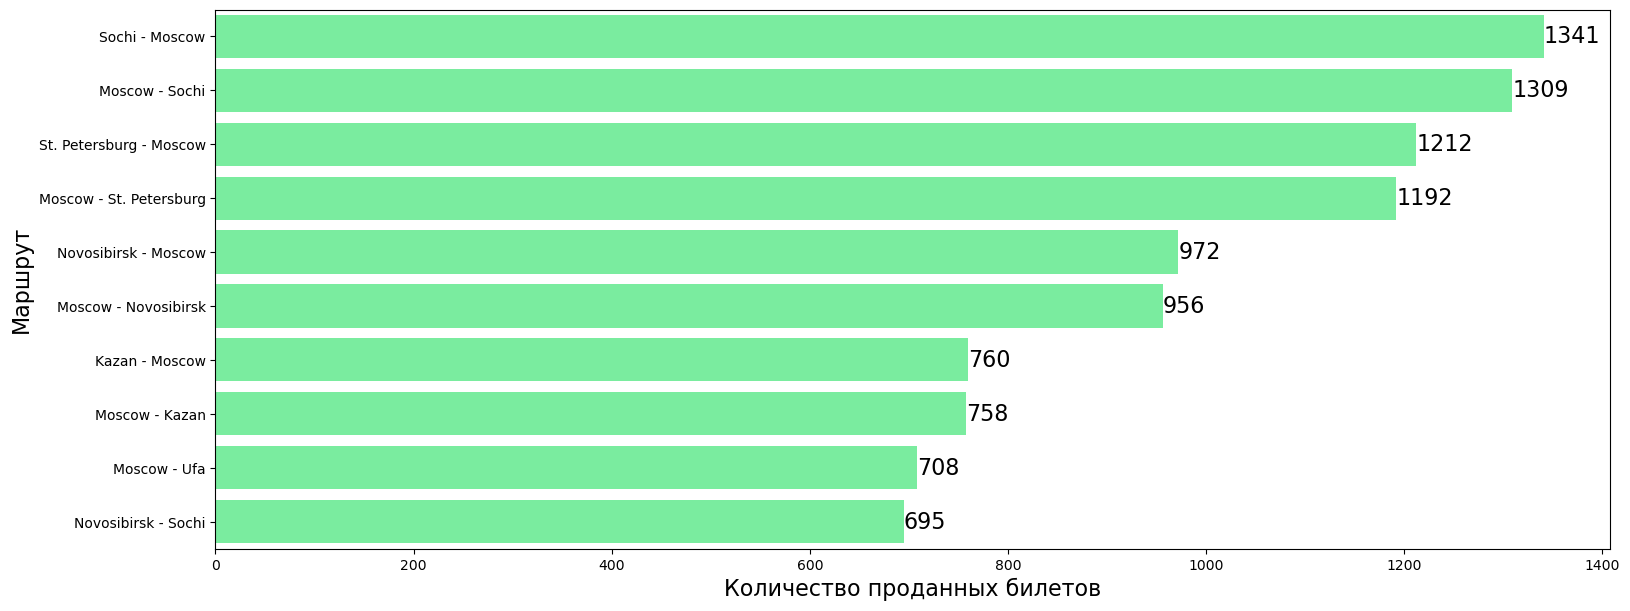

In [322]:
plt.figure(figsize=(18, 7))
axe = sns.barplot(data=routes.sort_values([('count', False)], ascending=False).head(10), x=('count', False), y='Маршрут', orient='h', color='#67ff98')
axe.set_xlabel('Количество проданных билетов', fontsize=16)
axe.set_ylabel('Маршрут', fontsize=16)
axe.bar_label(axe.containers[0], fontsize=16)


plt.show()

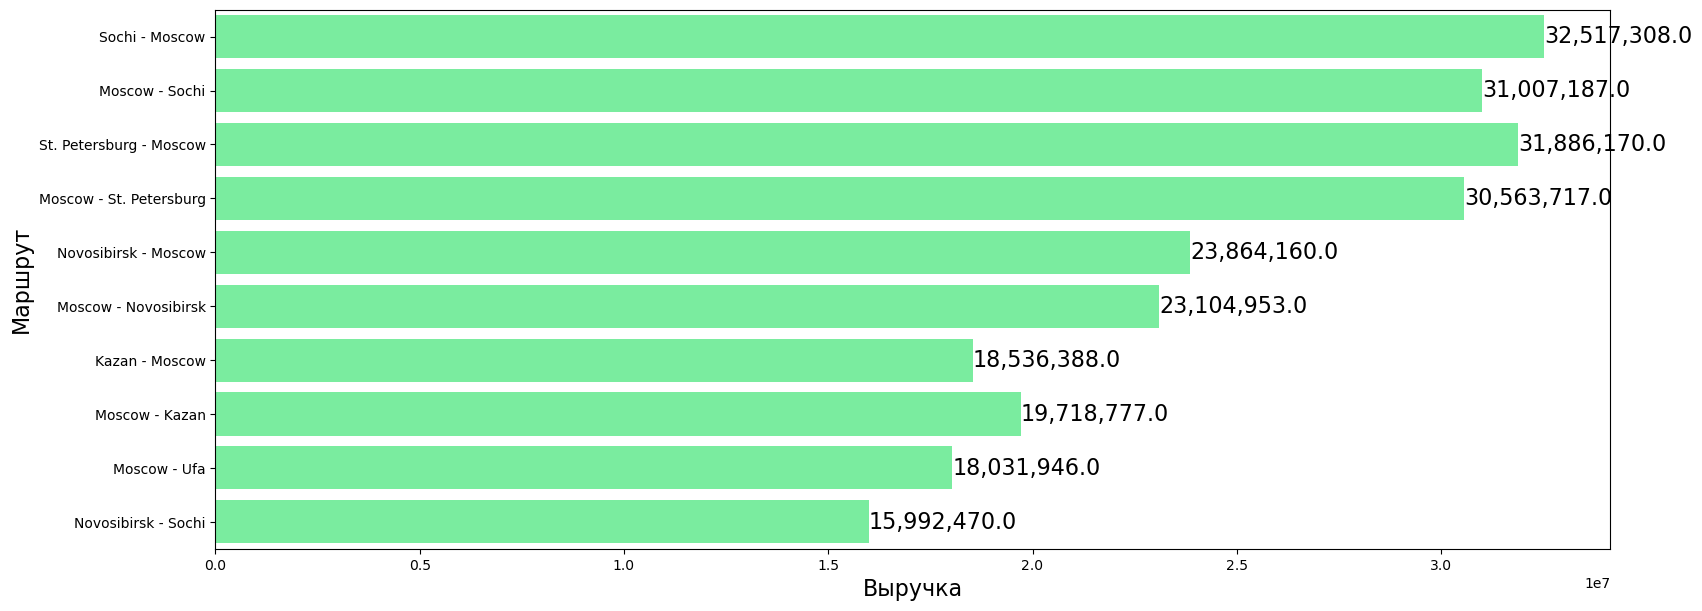

In [317]:
plt.figure(figsize=(18, 7))
axe = sns.barplot(data=routes.sort_values([('count', False)], ascending=False).head(10), x=('sum', False), y='Маршрут', orient='h', color='#67ff98')
axe.set_xlabel('Выручка', fontsize=16)
axe.set_ylabel('Маршрут', fontsize=16)
axe.bar_label(axe.containers[0], fontsize=16, fmt='{:,.1f}')

plt.show()

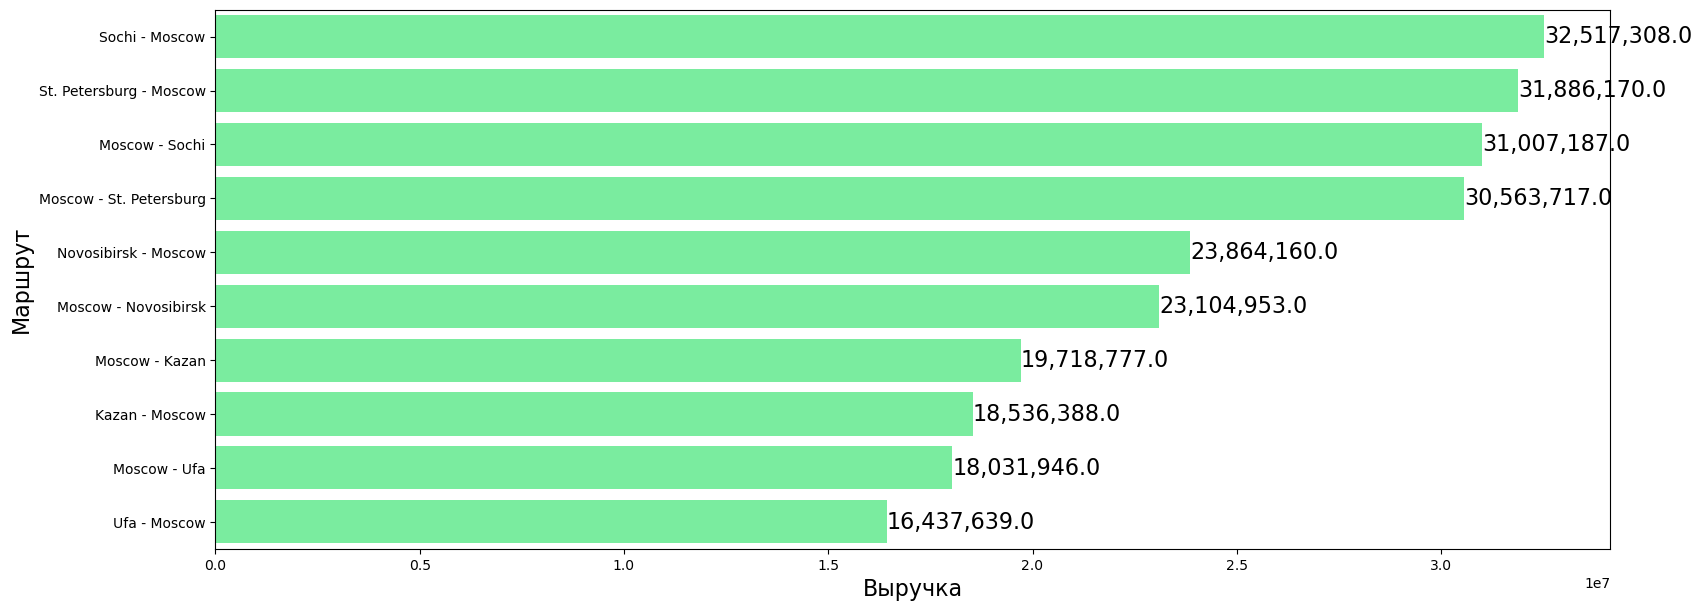

In [375]:
plt.figure(figsize=(18, 7))
axe = sns.barplot(data=routes.sort_values([('sum', False)], ascending=False).head(10), x=('sum', False), y='Маршрут', orient='h', color='#67ff98')
axe.set_xlabel('Выручка', fontsize=16)
axe.set_ylabel('Маршрут', fontsize=16)
axe.bar_label(axe.containers[0], fontsize=16, fmt='{:,.1f}')

plt.show()

In [319]:
routes.sort_values(('count', True), ascending=False).head(10)

Маршрут count          sum           
Международный перелёт                          False   True False       True
279                               Moscow - Osh   0.0  154.0   0.0  3729120.0
159                         Khudzhand - Moscow   0.0  146.0   0.0  3639902.0
441                               Osh - Moscow   0.0  136.0   0.0  3489748.0
252                         Moscow - Khudzhand   0.0  130.0   0.0  3220610.0
395                          Novosibirsk - Osh   0.0  122.0   0.0  3084080.0
353                      Novosibirsk - Bishkek   0.0  121.0   0.0  2960475.0
161                    Khudzhand - Novosibirsk   0.0  116.0   0.0  3022465.0
443                          Osh - Novosibirsk   0.0  116.0   0.0  2888543.0
218                           Moscow - Antalya   0.0  107.0   0.0  2476844.0
30                       Bishkek - Novosibirsk   0.0  102.0   0.0  2544583.0

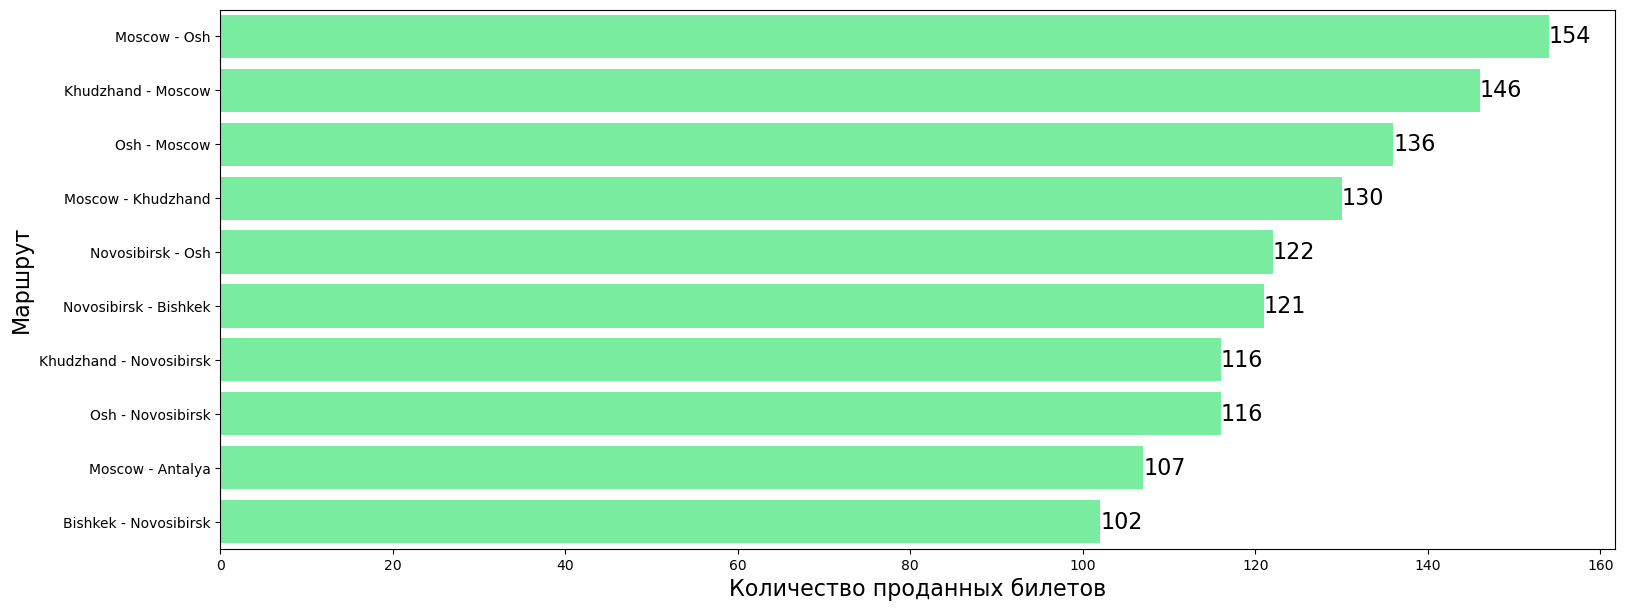

In [320]:
plt.figure(figsize=(18, 7))
axe = sns.barplot(data=routes.sort_values([('count', True)], ascending=False).head(10), x=('count', True), y='Маршрут', orient='h', color='#67ff98')
axe.set_xlabel('Количество проданных билетов', fontsize=16)
axe.set_ylabel('Маршрут', fontsize=16)
axe.bar_label(axe.containers[0], fontsize=16)


plt.show()

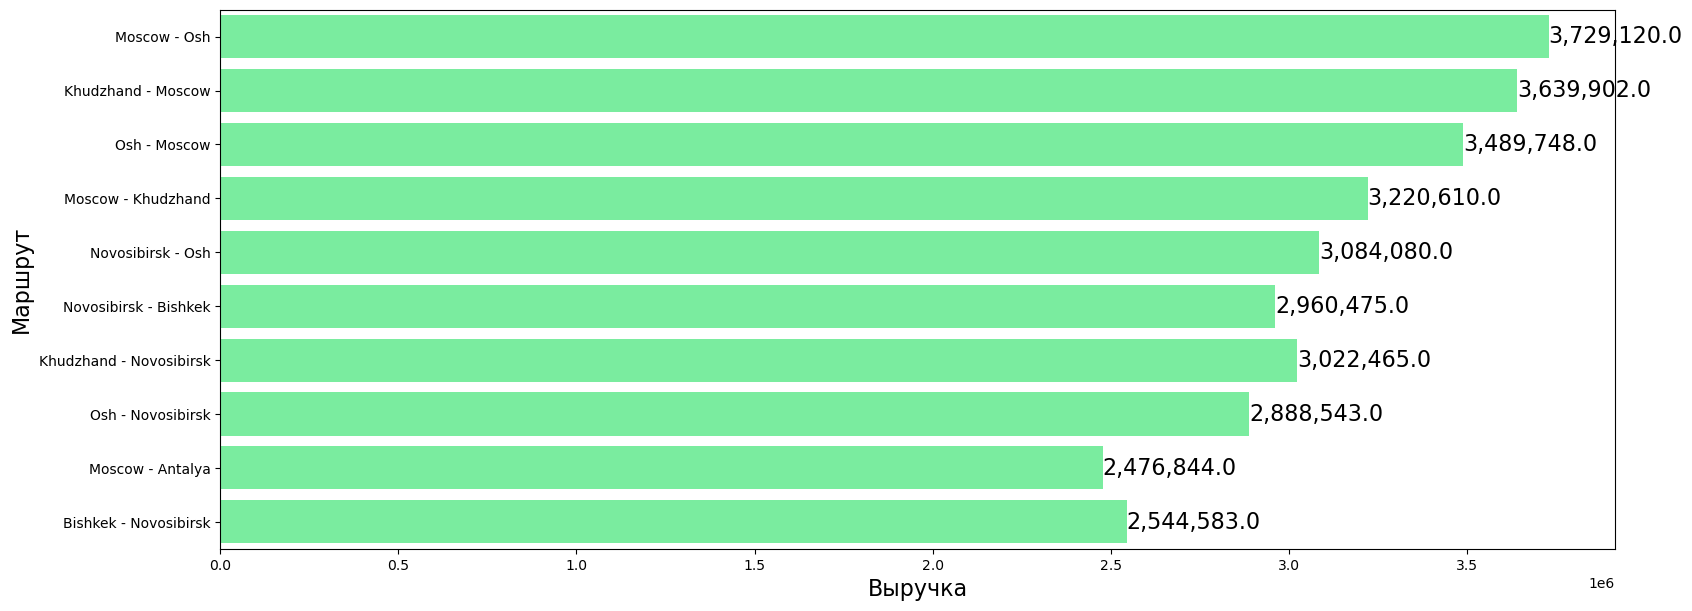

In [321]:
plt.figure(figsize=(18, 7))
axe = sns.barplot(data=routes.sort_values([('count', True)], ascending=False).head(10), x=('sum', True), y='Маршрут', orient='h', color='#67ff98')
axe.set_xlabel('Выручка', fontsize=16)
axe.set_ylabel('Маршрут', fontsize=16)
axe.bar_label(axe.containers[0], fontsize=16, fmt='{:,.1f}')

plt.show()

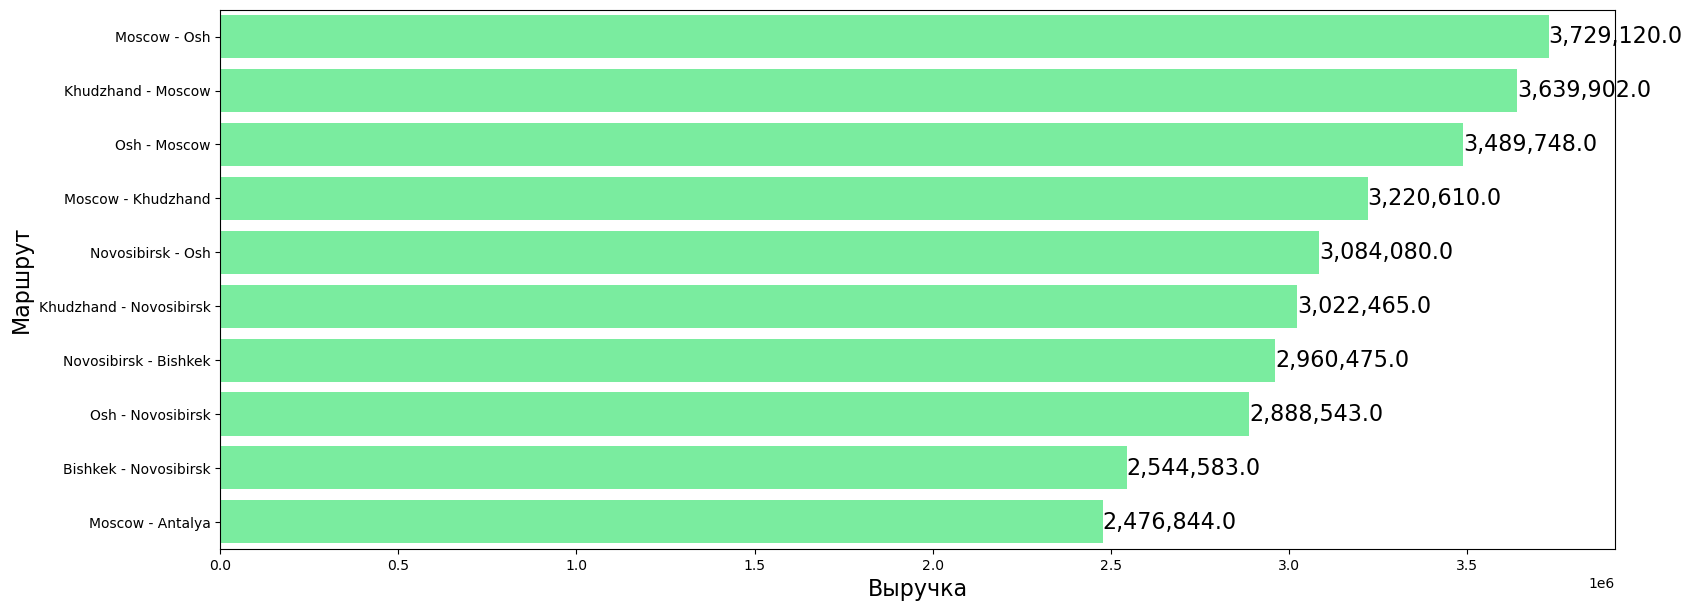

In [376]:
plt.figure(figsize=(18, 7))
axe = sns.barplot(data=routes.sort_values([('sum', True)], ascending=False).head(10), x=('sum', True), y='Маршрут', orient='h', color='#67ff98')
axe.set_xlabel('Выручка', fontsize=16)
axe.set_ylabel('Маршрут', fontsize=16)
axe.bar_label(axe.containers[0], fontsize=16, fmt='{:,.1f}')

plt.show()

<i>Выводы:
<br>1. По внутренним перелётам:
<br>1.1 Самые популярные маршруты: Сочи - Москва (1341 упоминание), Москва - Сочи (1309 упоминаний) и Санкт-Петербург - Москва (1212 упоминаний)
<br>1.2 32 человека улетели из Сочи в Москву и не вернулись, а из Москвы в Петербург не вернулись 20 человек
<br>1.3 Из топ-10 маршрутов по количеству пассажиров только маршрут Новосибирск-Сочи не включён в топ-10 по выручке, а на его месте маршрут Уфа-Москва
<br>
<br>2. По международным линиям:
<br>2.1 Единственный из 10 машрутов, не связанный с Центральной Азией - Москва - Аньалья (107 упоминаний)
<br>2.2. Больше всего людей (154) летело из Москвы в Ош (Кыргызстан)
<br>2.3 146 человек летело из Худжанда (Таджикистан) в Москву
<br>2.4 Всего пассажиропоток в Москве составил 663  человека, а в Новосибирске - 583
<br>2.5 Кроме Москвы и Новосибирска нет ни одного российского города в топ-10
<br>2.6 Выручка с международных перелётов в 10 раз меньше выручки с внутренних перелётов
<br>2.7 Все рейсы, перевозящие наибольшее количество пассажиров, приносят авиакомпаниям максимальную выручку
</i>

<i><strong>3.6. Зависимость выручки от прочих признаков</strong></i>

In [349]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49350 entries, 0 to 49349
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Дата покупки                49350 non-null  datetime64[ns]
 1   Дата перелёта               49350 non-null  datetime64[ns]
 2   Степень подготовки          49350 non-null  object        
 3   Возрастная категория        49350 non-null  object        
 4   Выручка                     49350 non-null  int64         
 5   Город отправления           49350 non-null  object        
 6   Город прибытия              49350 non-null  object        
 7   Международный перелёт       49350 non-null  bool          
 8   Наличие системы лояльности  49350 non-null  bool          
 9   Билет приобретён по сети    49350 non-null  bool          
 10  Сезон                       49350 non-null  object        
dtypes: bool(3), datetime64[ns](2), int64(1), object(5)
mem

<Axes: >

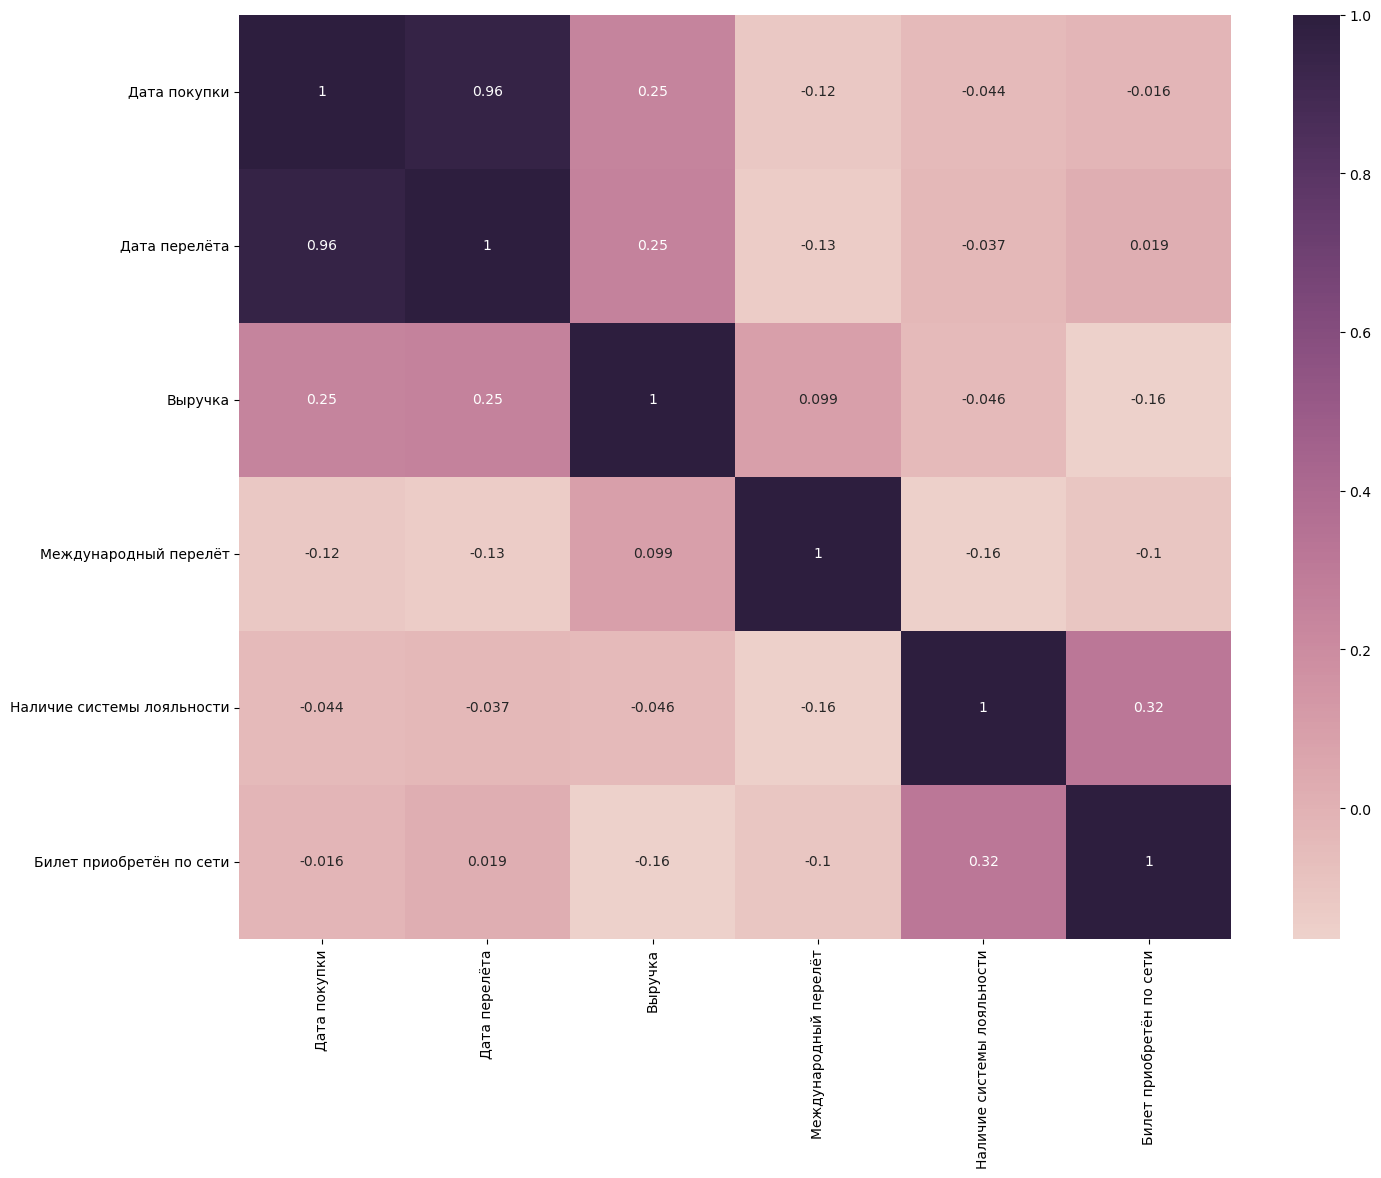

In [374]:
plt.figure(figsize=(16, 12))
sns.heatmap(flight_data[['Дата покупки', 'Дата перелёта', 
                         'Выручка', 'Международный перелёт', 
                         'Наличие системы лояльности', 'Билет приобретён по сети']].corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

<i>Выводы:
<br>1. Сильнее всего выручка зависит от даты покупки и даты перелёта (и то эта связь слабая)
<br>2. Наличие системы лояльности и место покупки билета имеют умеренную связь
</i>